# Case Study-2:Network Intrusions Detection

In [78]:
# Packages required for data importing, manipulation, exploratory data analysis and data understanding
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Modules required for data preprocessing
from sklearn.preprocessing import StandardScaler

# Modules required for train test split
from sklearn.model_selection import train_test_split,GridSearchCV

# Modules required for feature selection/reduction
from sklearn.feature_selection import RFE,SelectKBest,f_classif

# Module required for  VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modules required for supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import SVC

#Module required for calculation of metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Module required for sampling
from imblearn.over_sampling import SMOTE

## Note

      1.For binomial classification every attack type is imputed as 1 and normal or no attack as 0
      2. For Multinomial classification every attack type is imputed as a unique number from 1 
         to 10, each number relating to different attack type and normal or no attack as 0

### 1.Importing data

In [79]:
df1 = pd.read_csv('Data_of_Attack_Back.csv')
# Creating binary flag
df1['Bin_Attack'] = 1
# Creating multiclass flag
df1['Multi_Attack']=1

In [80]:
df2=pd.read_csv('Data_of_Attack_Back_BufferOverflow.csv')
# Creating binary flag
df2['Bin_Attack'] = 1
# Creating multiclass flag
df2['Multi_Attack']=2

In [81]:
df3=pd.read_csv('Data_of_Attack_Back_FTPWrite.csv',header=None)
df3.columns=df1.columns.difference(['Bin_Attack','Multi_Attack'])
# Creating binary flag
df3['Bin_Attack'] = 1
# Creating multiclass flag
df3['Multi_Attack']=3

In [82]:
df4=pd.read_csv('Data_of_Attack_Back_GuessPassword.csv')
# Creating binary flag
df4['Bin_Attack'] = 1
# Creating multiclass flag
df4['Multi_Attack']=4

In [83]:
df5=pd.read_csv('Data_of_Attack_Back_Neptune.csv')
# Creating binary flag
df5['Bin_Attack'] = 1
# Creating multiclass flag
df5['Multi_Attack']=5

# Sampling the data : Data for Attack neptune is very big
df5 = df5.sample(random_state=123,frac=0.05)

In [84]:
df6=pd.read_csv('Data_of_Attack_Back_NMap.csv')
# Creating binary flag
df6['Bin_Attack'] = 1
# Creating multiclass flag
df6['Multi_Attack']=6

In [85]:
df7=pd.read_csv('Data_of_Attack_Back_Normal.csv')
# Creating binary flag
df7['Bin_Attack'] = 0
# Creating multiclass flag
df7['Multi_Attack']=0

# Sampling the data : Data for Normal or No attack is very big
df7 = df7.sample(random_state=123,frac=0.05)

In [86]:
df8 = pd.read_csv('Data_of_Attack_Back_PortSweep.csv')
# Creating binary flag
df8['Bin_Attack'] = 1
# Creating multiclass flag
df8['Multi_Attack']=7

In [87]:
df9 = pd.read_csv('Data_of_Attack_Back_RootKit.csv')
# Creating binary flag
df9['Bin_Attack'] = 1
# Creating multiclass flag
df9['Multi_Attack']=8

In [88]:
df10 = pd.read_csv('Data_of_Attack_Back_Satan.csv')
# Creating binary flag
df10['Bin_Attack'] = 1
# Creating multiclass flag
df10['Multi_Attack']=9

In [89]:
df11 = pd.read_csv('Data_of_Attack_Back_Smurf.csv')
# Creating binary flag
df11['Bin_Attack'] = 1
# Creating multiclass flag
df11['Multi_Attack']=10

In [90]:
# Merging all the data
main_df= pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11],ignore_index=True)
main_df.head(2)

duration   protocol_type   service   flag   src_bytes   dst_bytes   land  \
0       0.0             0.0       0.0    0.0      0.5454     0.08314      0   
1       0.0             0.0       0.0    0.0      0.5454     0.08314      0   

    wrong_fragment   urgent   hot  ...   dst_host_same_srv_rate  \
0              0.0      0.0   0.2  ...                      0.1   
1              0.0      0.0   0.2  ...                      0.1   

    dst_host_diff_srv_rate   dst_host_same_src_port_rate  \
0                      0.0                          0.10   
1                      0.0                          0.05   

    dst_host_srv_diff_host_rate   dst_host_serror_rate  \
0                           0.0                    0.0   
1                           0.0                    0.0   

    dst_host_srv_serror_rate   dst_host_rerror_rate  \
0                        0.0                    0.0   
1                        0.0                    0.0   

    dst_host_srv_rerror_rate  Bin_Attack  Multi_Attack  
0                        0.0           1             1  
1                        0.0           1             1  

[2 rows x 43 columns]

In [91]:
main_df.Bin_Attack.value_counts()/main_df.shape[0]

0    0.535886
1    0.464114
Name: Bin_Attack, dtype: float64

In [92]:
main_df.Multi_Attack.value_counts()/main_df.shape[0]

0     0.535886
5     0.211132
9     0.093273
10    0.055882
7     0.055083
6     0.028879
1     0.017989
4     0.000985
2     0.000558
8     0.000186
3     0.000149
Name: Multi_Attack, dtype: float64

In [93]:
# Removing whitespaces from column names
main_df.columns = [x.strip() for x in main_df.columns]

In [94]:
# Correcting the column name acc. to data dictionary
main_df.rename(columns={'is_host_login':'is_hot_login'},inplace=True)

In [95]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53810 entries, 0 to 53809
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     53810 non-null  float64
 1   protocol_type                53810 non-null  float64
 2   service                      53810 non-null  float64
 3   flag                         53810 non-null  float64
 4   src_bytes                    53810 non-null  float64
 5   dst_bytes                    53810 non-null  float64
 6   land                         53810 non-null  int64  
 7   wrong_fragment               53810 non-null  float64
 8   urgent                       53810 non-null  float64
 9   hot                          53810 non-null  float64
 10  num_failed_logins            53810 non-null  float64
 11  logged_in                    53810 non-null  float64
 12  num_compromised              53810 non-null  float64
 13  root_shell      

### Types of feature available
    1.Binary
    2.Nominal
    3.Numeric

#### Binary features

In [96]:
binary_col = ['land','logged_in','root_shell','su_attempted','is_hot_login','is_guest_login']

In [97]:
main_df.loc[:,binary_col].head(2)

land  logged_in  root_shell  su_attempted  is_hot_login  is_guest_login
0     0        0.1         0.0           0.0           0.0             0.0
1     0        0.1         0.0           0.0           0.0             0.0

In [98]:
# Checking for unique values
main_df.loc[:,binary_col].nunique()
# Binary features should contain only 2 unique values
# su_attempted and land feature is giving some abnormal behaviour

land              1
logged_in         2
root_shell        2
su_attempted      2
is_hot_login      2
is_guest_login    2
dtype: int64

In [99]:
# 'su_attempted' fetaure
# 1 for 'su_root' attempted and 0 otherwise
main_df.su_attempted = main_df.su_attempted.map({0.2:1,0.1:1,0.0:0})

In [100]:
main_df.su_attempted.value_counts()

0    53808
1        2
Name: su_attempted, dtype: int64

In [101]:
main_df.loc[:,['su_attempted','Bin_Attack']].groupby('su_attempted').mean()
# When 'su_root' command is not attempted or used ,in nearly 30% cases,it leads to attack 

Bin_Attack
su_attempted            
0               0.464132
1               0.000000

In [102]:
# Land feature
main_df.land.value_counts()

0    53810
Name: land, dtype: int64

In [103]:
print(np.var(main_df.land))
# land variable has zero variance ,dropping this feature
main_df.drop(columns=['land'],inplace=True)
binary_col.remove('land') # removing 'land' from list of binary features

0.0


#### EDA for binary features

In [104]:
# logged_in feature-  1 for successfull log in and 0 otherwise 

main_df.logged_in = main_df.logged_in*10 # converting 0.1 to 1
main_df.loc[:,['logged_in','Bin_Attack']].groupby('logged_in').mean()

Bin_Attack
logged_in            
0.0          0.894999
1.0          0.039305

In [105]:
# unsuccessful login leads to attack more than 80% of time.
# Swift action should be taken whenever there is an unsucessful login.

In [106]:
main_df.root_shell.value_counts()

0.0    53768
0.1       42
Name: root_shell, dtype: int64

In [107]:
# root_shell feature- 1 if rootshell is obtained  and 0 otherwise

main_df.root_shell = main_df.root_shell*10 # converting 0.1 to 1
main_df.loc[:,['root_shell','Bin_Attack']].groupby('root_shell').mean()

Bin_Attack
root_shell            
0.0           0.463956
1.0           0.666667

In [108]:
# is_hot_login feature - if the login belongs to 'HOT' list,0 otherwise

main_df.is_hot_login = main_df.is_hot_login*10  # converting 0.1 to 1
main_df.loc[:,['is_hot_login','Bin_Attack']].groupby('is_hot_login').mean()

Bin_Attack
is_hot_login            
0.0             0.464095
1.0             1.000000

In [109]:
# is_guest_login feature -# 1 for guest login, 0 therwise

main_df.is_guest_login = main_df.is_guest_login*10 # converting 0.1 to 1
main_df.loc[:,['is_guest_login','Bin_Attack']].groupby('is_guest_login').mean()

Bin_Attack
is_guest_login            
0.0               0.465155
1.0               0.031008

In [110]:
# Frequency plot for categorical features
def fn_create_freq_plot(x):
    plt.figure(figsize=(7,4))
    plt.title('Frequency plot for ' + x.name )
    x.value_counts().plot(kind='bar',edgecolor='tomato',color='steelblue')
    plt.show()

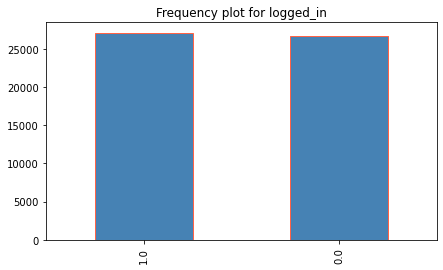

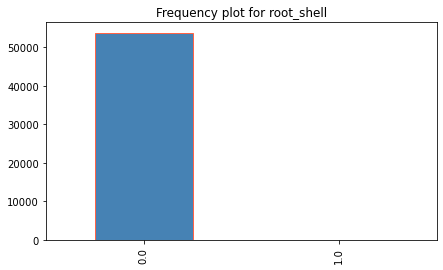

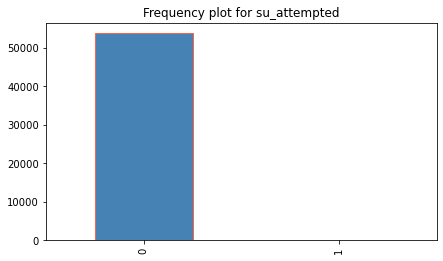

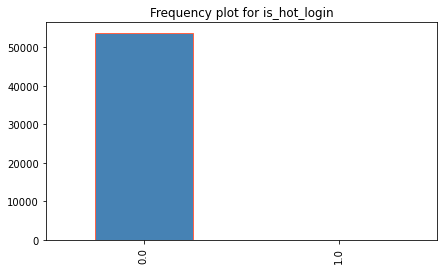

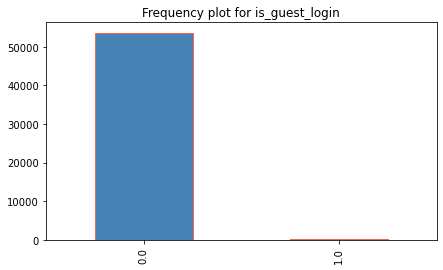

In [111]:
main_df[binary_col].apply(fn_create_freq_plot)
plt.show()

#### Observations from EDA
    # Unsuccessfull logins leads to attack(any kind) in 81% of the time.
    # Logins belonging to the hot list leads to attack 66% of the time as compared to 29% when the         logins does not belongs to the hot list.
        

### Nominal_features

In [112]:
nominal_col = ['protocol_type','service','flag']

In [113]:
# Separating continuous features from binary and nominal features
cont_col = main_df.columns.difference(set(binary_col).union(nominal_col).union(('Bin_Attack','Multi_Attack')))

In [114]:
# Cardinality of nominal features
main_df[nominal_col].nunique()

protocol_type     3
service          69
flag             11
dtype: int64

In [115]:
# UDF to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

In [116]:
# Dummy variable creation for nominal features
for feature in nominal_col:
    main_df = create_dummies(main_df,feature)

In [117]:
# Converting column names to INC rules
main_df.columns =  [x.replace('.','_') for x in main_df.columns]

### Continuous features

In [118]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [119]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [120]:
main_df[cont_col].apply(continuous_var_summary)

count  diff_srv_rate     dst_bytes  dst_host_count  \
N       53810.000000   53810.000000  53810.000000    53810.000000   
NMISS       0.000000       0.000000      0.000000        0.000000   
SUM      4931.650900     545.746000   1079.758060     9564.225000   
MEAN        0.091649       0.010142      0.020066        0.177741   
MEDIAN      0.012000       0.000000      0.001045        0.255000   
STD         0.143550       0.026354      0.060621        0.099742   
VAR         0.020607       0.000695      0.003675        0.009948   
MIN         0.000000       0.000000      0.000000        0.000000   
P1          0.001000       0.000000      0.000000        0.001000   
P5          0.001000       0.000000      0.000000        0.004000   
P10         0.001000       0.000000      0.000000        0.014000   
P25         0.002000       0.000000      0.000000        0.072000   
P50         0.012000       0.000000      0.001045        0.255000   
P75         0.134000       0.006000      0.014050        0.255000   
P90         0.284000       0.026000      0.057542        0.255000   
P95         0.509000       0.100000      0.093962        0.255000   
P99         0.511000       0.100000      0.271429        0.255000   
MAX         0.511000       0.100000      1.000000        0.255000   

        dst_host_diff_srv_rate  dst_host_rerror_rate  \
N                 53810.000000          53810.000000   
NMISS                 0.000000              0.000000   
SUM                 640.193660            699.784580   
MEAN                  0.011897              0.013005   
MEDIAN                0.001000              0.000000   
STD                   0.025903              0.030419   
VAR                   0.000671              0.000925   
MIN                   0.000000              0.000000   
P1                    0.000000              0.000000   
P5                    0.000000              0.000000   
P10                   0.000000              0.000000   
P25                   0.000000              0.000000   
P50                   0.001000              0.000000   
P75                   0.007000              0.000000   
P90                   0.047000              0.080000   
P95                   0.097000              0.100000   
P99                   0.100000              0.100000   
MAX                   0.100000              0.394450   

        dst_host_same_src_port_rate  dst_host_same_srv_rate  \
N                      53810.000000            53810.000000   
NMISS                      0.000000                0.000000   
SUM                      890.338000             3169.365000   
MEAN                       0.016546                0.058899   
MEDIAN                     0.001000                0.097000   
STD                        0.031851                0.045629   
VAR                        0.001014                0.002082   
MIN                        0.000000                0.000000   
P1                         0.000000                0.000000   
P5                         0.000000                0.000000   
P10                        0.000000                0.000000   
P25                        0.000000                0.004000   
P50                        0.001000                0.097000   
P75                        0.010000                0.100000   
P90                        0.087000                0.100000   
P95                        0.100000                0.100000   
P99                        0.100000                0.100000   
MAX                        0.100000                0.100000   

        dst_host_serror_rate  dst_host_srv_count  ...   rerror_rate  \
N               53810.000000        53810.000000  ...  53810.000000   
NMISS               0.000000            0.000000  ...      0.000000   
SUM              1095.949000         7435.960000  ...    758.230000   
MEAN                0.020367            0.138189  ...      0.014091   
MEDIAN              0.000000            0.162000  ...      0.000000   
STD           

In [121]:
# Boxplot for continuous features
def box_plot_fn(x):
    plt.title('boxplot for '+ x.name)
    sns.boxplot(x)
    plt.show()

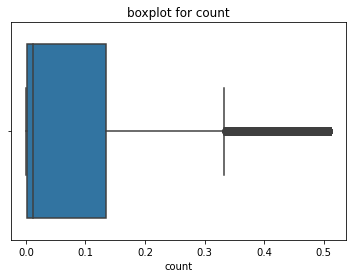

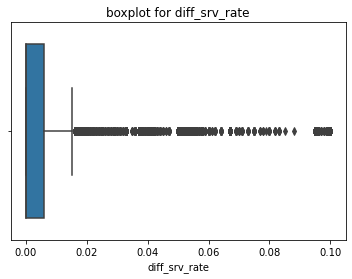

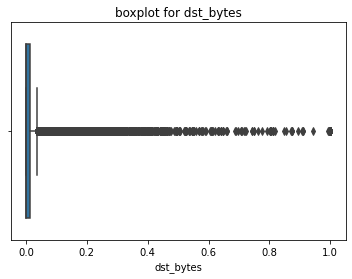

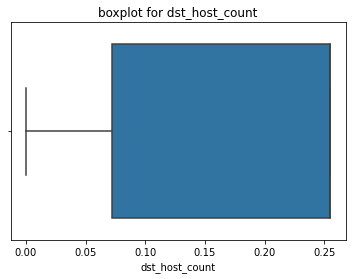

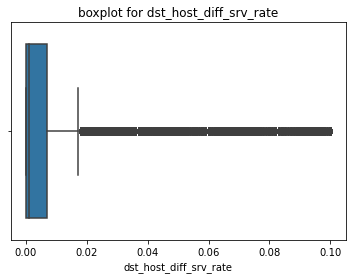

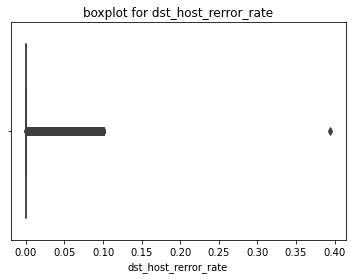

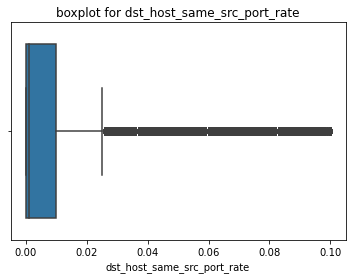

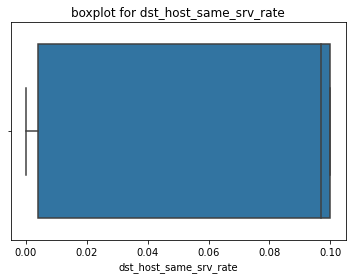

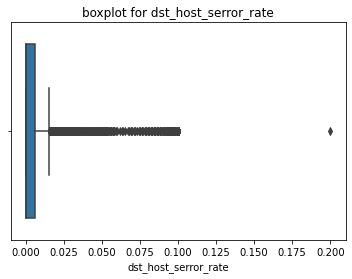

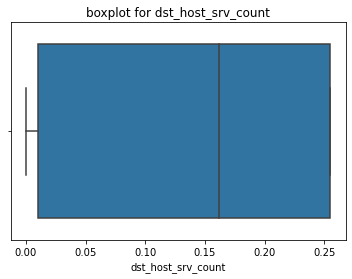

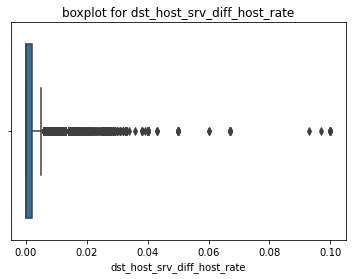

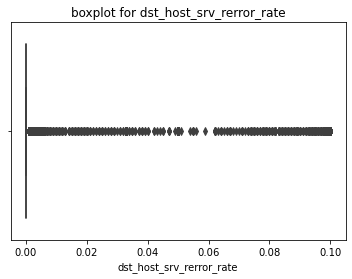

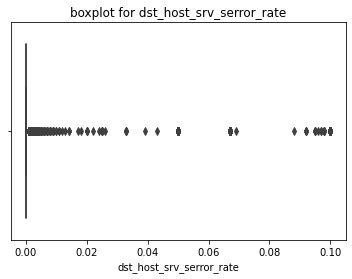

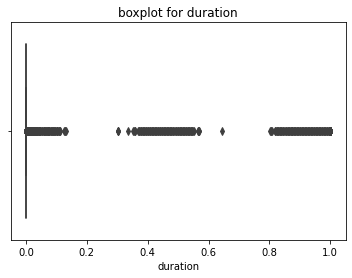

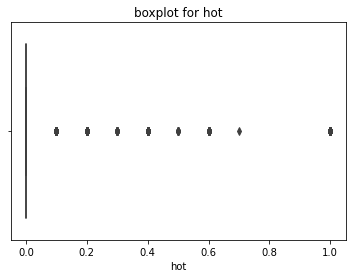

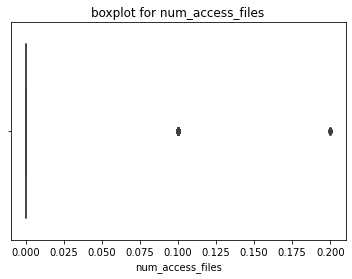

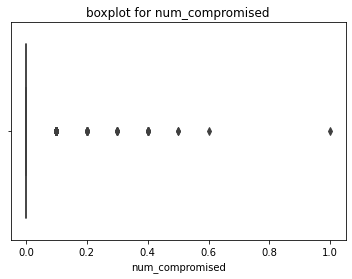

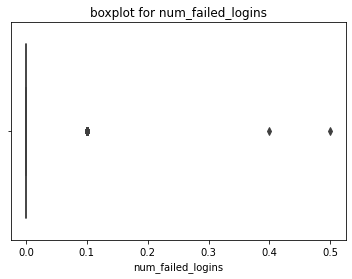

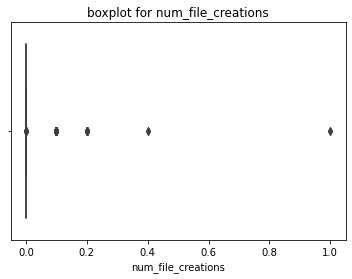

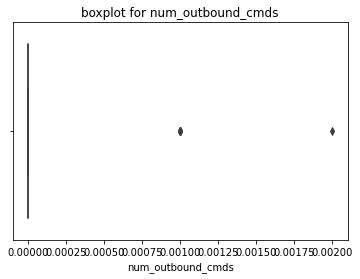

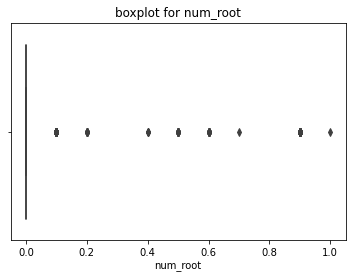

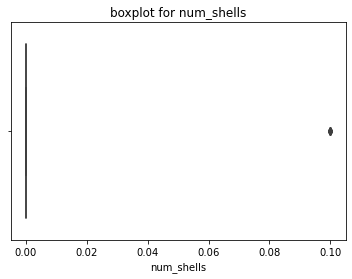

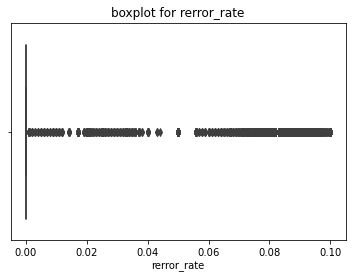

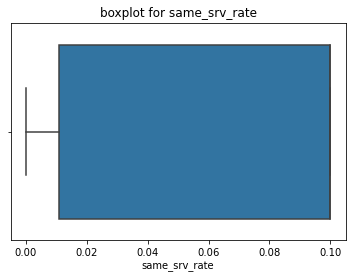

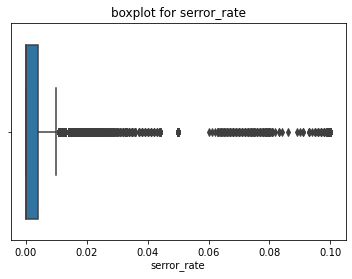

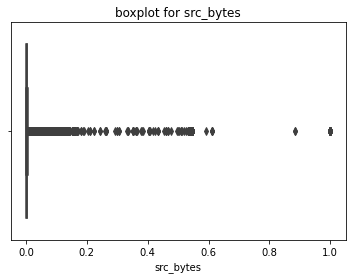

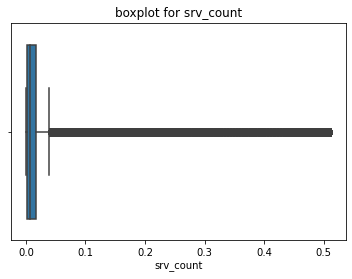

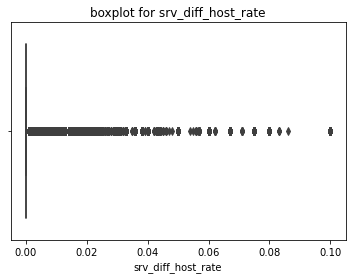

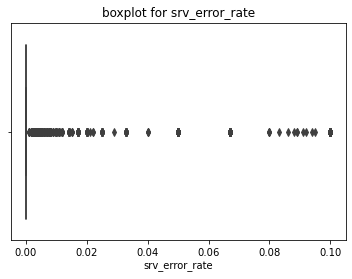

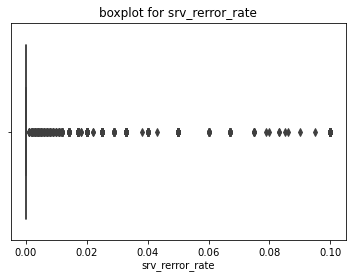

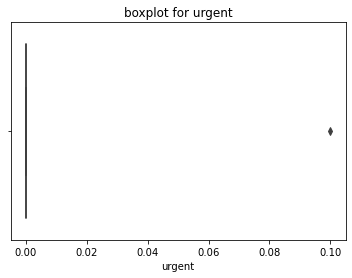

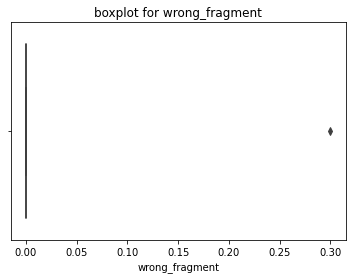

In [122]:
main_df[cont_col].apply(box_plot_fn)
plt.show()

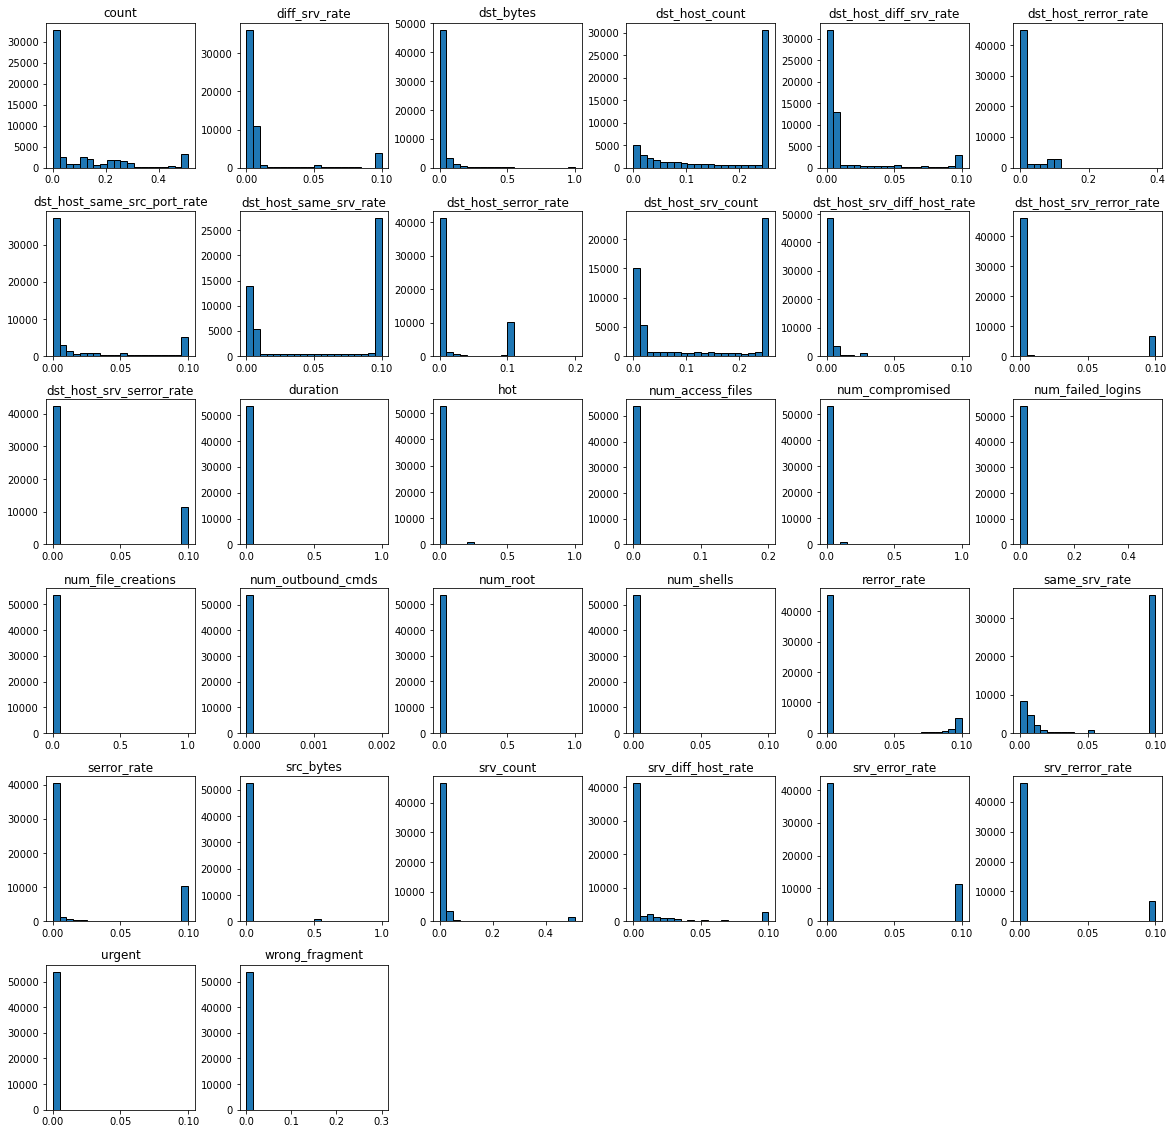

In [123]:
# Distribution of continuous features
main_df.loc[:,cont_col].hist(bins=20, figsize=(20,20),edgecolor='black' ,grid=False)
plt.show()

In [124]:
# outlier treatment for continuous variables
main_df[cont_col] = main_df[cont_col].apply(lambda x:x.clip(lower=x.quantile(0.01),upper=x.quantile(0.99)))

In [125]:
main_df[cont_col].apply(continuous_var_summary)

count  diff_srv_rate     dst_bytes  dst_host_count  \
N       53810.000000   53810.000000  53810.000000    53810.000000   
NMISS       0.000000       0.000000      0.000000        0.000000   
SUM      4931.656900     545.746000    974.174185     9564.235000   
MEAN        0.091649       0.010142      0.018104        0.177741   
MEDIAN      0.012000       0.000000      0.001045        0.255000   
STD         0.143550       0.026354      0.042508        0.099741   
VAR         0.020607       0.000695      0.001807        0.009948   
MIN         0.001000       0.000000      0.000000        0.001000   
P1          0.001000       0.000000      0.000000        0.001000   
P5          0.001000       0.000000      0.000000        0.004000   
P10         0.001000       0.000000      0.000000        0.014000   
P25         0.002000       0.000000      0.000000        0.072000   
P50         0.012000       0.000000      0.001045        0.255000   
P75         0.134000       0.006000      0.014050        0.255000   
P90         0.284000       0.026000      0.057542        0.255000   
P95         0.509000       0.100000      0.093962        0.255000   
P99         0.511000       0.100000      0.271428        0.255000   
MAX         0.511000       0.100000      0.271429        0.255000   

        dst_host_diff_srv_rate  dst_host_rerror_rate  \
N                 53810.000000          53810.000000   
NMISS                 0.000000              0.000000   
SUM                 640.193660            699.490130   
MEAN                  0.011897              0.012999   
MEDIAN                0.001000              0.000000   
STD                   0.025903              0.030376   
VAR                   0.000671              0.000923   
MIN                   0.000000              0.000000   
P1                    0.000000              0.000000   
P5                    0.000000              0.000000   
P10                   0.000000              0.000000   
P25                   0.000000              0.000000   
P50                   0.001000              0.000000   
P75                   0.007000              0.000000   
P90                   0.047000              0.080000   
P95                   0.097000              0.100000   
P99                   0.100000              0.100000   
MAX                   0.100000              0.100000   

        dst_host_same_src_port_rate  dst_host_same_srv_rate  \
N                      53810.000000            53810.000000   
NMISS                      0.000000                0.000000   
SUM                      890.338000             3169.365000   
MEAN                       0.016546                0.058899   
MEDIAN                     0.001000                0.097000   
STD                        0.031851                0.045629   
VAR                        0.001014                0.002082   
MIN                        0.000000                0.000000   
P1                         0.000000                0.000000   
P5                         0.000000                0.000000   
P10                        0.000000                0.000000   
P25                        0.000000                0.004000   
P50                        0.001000                0.097000   
P75                        0.010000                0.100000   
P90                        0.087000                0.100000   
P95                        0.100000                0.100000   
P99                        0.100000                0.100000   
MAX                        0.100000                0.100000   

        dst_host_serror_rate  dst_host_srv_count  ...   rerror_rate  \
N               53810.000000        53810.000000  ...  53810.000000   
NMISS               0.000000            0.000000  ...      0.000000   
SUM              1095.849000         7435.968000  ...    758.230000   
MEAN                0.020365            0.138189  ...      0.014091   
MEDIAN              0.000000            0.162000  ...      0.000000   
STD           

In [126]:
corr_plot=main_df[cont_col].corr()
corr_plot

count  diff_srv_rate  dst_bytes  \
count                        1.000000       0.474957  -0.249882   
diff_srv_rate                0.474957       1.000000  -0.160520   
dst_bytes                   -0.249882      -0.160520   1.000000   
dst_host_count               0.430867       0.264171  -0.245943   
dst_host_diff_srv_rate       0.453217       0.770887  -0.190974   
dst_host_rerror_rate         0.343462       0.574117  -0.171086   
dst_host_same_src_port_rate  0.062729      -0.030865  -0.124968   
dst_host_same_srv_rate      -0.497282      -0.471713   0.365203   
dst_host_serror_rate         0.330183       0.003838  -0.219292   
dst_host_srv_count          -0.457517      -0.439554   0.354267   
dst_host_srv_diff_host_rate -0.243223      -0.140458   0.047910   
dst_host_srv_rerror_rate     0.217014       0.522839  -0.154992   
dst_host_srv_serror_rate     0.374432       0.083544  -0.220906   
duration                    -0.076181      -0.039266  -0.019145   
hot                         -0.092014      -0.050987   0.188701   
num_access_files                  NaN            NaN        NaN   
num_compromised             -0.081777      -0.047999   0.204214   
num_failed_logins                 NaN            NaN        NaN   
num_file_creations                NaN            NaN        NaN   
num_outbound_cmds                 NaN            NaN        NaN   
num_root                          NaN            NaN        NaN   
num_shells                        NaN            NaN        NaN   
rerror_rate                  0.293059       0.611856  -0.169203   
same_srv_rate               -0.566172      -0.541614   0.290152   
serror_rate                  0.322483       0.005396  -0.216613   
src_bytes                   -0.092439      -0.063918   0.191264   
srv_count                    0.538311      -0.118082  -0.096424   
srv_diff_host_rate          -0.242839      -0.134433   0.024092   
srv_error_rate               0.372906       0.083291  -0.218266   
srv_rerror_rate              0.212594       0.518969  -0.151466   
urgent                            NaN            NaN        NaN   
wrong_fragment                    NaN            NaN        NaN   

                             dst_host_count  dst_host_diff_srv_rate  \
count                              0.430867                0.453217   
diff_srv_rate                      0.264171                0.770887   
dst_bytes                         -0.245943               -0.190974   
dst_host_count                     1.000000                0.275908   
dst_host_diff_srv_rate             0.275908                1.000000   
dst_host_rerror_rate               0.207084                0.704723   
dst_host_same_src_port_rate       -0.093400                0.152989   
dst_host_same_srv_rate            -0.530469               -0.547158   
dst_host_serror_rate               0.381600                0.011944   
dst_host_srv_count                -0.398991               -0.512078   
dst_host_srv_diff_host_rate       -0.563323               -0.166191   
dst_host_srv_rerror_rate           0.177052                0.559190   
dst_host_srv_serror_rate           0.383738                0.083892   
duration                           0.029383                0.138777   
hot                               -0.061725               -0.062246   
num_access_files                        NaN                     NaN   
num_compromised                   -0.052171               -0.059487   
num_failed_logins                       NaN                     NaN   
num_file_creations                      NaN                     NaN   
num_outbound_cmds                       NaN                     NaN   
num_root                                NaN                     NaN   
num_shells                              NaN                     NaN   
rerror_rate                        0.200779                0.645285   
same_srv_rate                     -0.512847               -0.416750   
serror_rate                        0.378056  

In [127]:
# Dropping continuous columns showing no correlation
cont_col = cont_col.drop(['hot','num_access_files','num_compromised','num_failed_logins','num_file_creations',
                          'num_outbound_cmds','num_root','num_shells','urgent','wrong_fragment'])

In [128]:
corr_plot_new=main_df[cont_col].corr()
#corr_plot_new.to_excel('corr_matrix_new.xlsx')
corr_plot_new

count  diff_srv_rate  dst_bytes  \
count                        1.000000       0.474957  -0.249882   
diff_srv_rate                0.474957       1.000000  -0.160520   
dst_bytes                   -0.249882      -0.160520   1.000000   
dst_host_count               0.430867       0.264171  -0.245943   
dst_host_diff_srv_rate       0.453217       0.770887  -0.190974   
dst_host_rerror_rate         0.343462       0.574117  -0.171086   
dst_host_same_src_port_rate  0.062729      -0.030865  -0.124968   
dst_host_same_srv_rate      -0.497282      -0.471713   0.365203   
dst_host_serror_rate         0.330183       0.003838  -0.219292   
dst_host_srv_count          -0.457517      -0.439554   0.354267   
dst_host_srv_diff_host_rate -0.243223      -0.140458   0.047910   
dst_host_srv_rerror_rate     0.217014       0.522839  -0.154992   
dst_host_srv_serror_rate     0.374432       0.083544  -0.220906   
duration                    -0.076181      -0.039266  -0.019145   
rerror_rate                  0.293059       0.611856  -0.169203   
same_srv_rate               -0.566172      -0.541614   0.290152   
serror_rate                  0.322483       0.005396  -0.216613   
src_bytes                   -0.092439      -0.063918   0.191264   
srv_count                    0.538311      -0.118082  -0.096424   
srv_diff_host_rate          -0.242839      -0.134433   0.024092   
srv_error_rate               0.372906       0.083291  -0.218266   
srv_rerror_rate              0.212594       0.518969  -0.151466   

                             dst_host_count  dst_host_diff_srv_rate  \
count                              0.430867                0.453217   
diff_srv_rate                      0.264171                0.770887   
dst_bytes                         -0.245943               -0.190974   
dst_host_count                     1.000000                0.275908   
dst_host_diff_srv_rate             0.275908                1.000000   
dst_host_rerror_rate               0.207084                0.704723   
dst_host_same_src_port_rate       -0.093400                0.152989   
dst_host_same_srv_rate            -0.530469               -0.547158   
dst_host_serror_rate               0.381600                0.011944   
dst_host_srv_count                -0.398991               -0.512078   
dst_host_srv_diff_host_rate       -0.563323               -0.166191   
dst_host_srv_rerror_rate           0.177052                0.559190   
dst_host_srv_serror_rate           0.383738                0.083892   
duration                           0.029383                0.138777   
rerror_rate                        0.200779                0.645285   
same_srv_rate                     -0.512847               -0.416750   
serror_rate                        0.378056                0.009641   
src_bytes                         -0.059296               -0.074352   
srv_count                          0.133066               -0.105226   
srv_diff_host_rate                -0.320207               -0.152107   
srv_error_rate                     0.382743                0.083344   
srv_rerror_rate                    0.181186                0.554512   

                             dst_host_rerror_rate  \
count                                    0.343462   
diff_srv_rate                            0.574117   
dst_bytes                               -0.171086   
dst_host_count                           0.207084   
dst_host_diff_srv_rate                   0.704723   
dst_host_rerror_rate                     1.000000   
dst_host_same_src_port_rate              0.130496   
dst_host_same_srv_rate                  -0.435250   
dst_host_serror_rate                    -0.169140   
dst_host_srv_count                      -0.425234   
dst_host_srv_diff_host_rate             -0.040892   
dst_host_srv_rerror_rate                 0.840868   
dst_host_srv_serror_rate                -0.112008   
duration                                 0.185343   
rerror_rate                              0.902102   
same_srv

### Observation from correlation table:
      A. Serror rate is positively correlated with
          1.srv_error_rate
          2.dst_host_serror_rate
          3.dst_host_srv_serror_rate
      
      B. rerror_rate is positively correlated with 
          1.dst_host_rerror_rate
          2.dst_host_srv_rerror_rate
          3.srv_rerror_rate
     
      C. same_srv_rate positively correlated with dst_host_same_srv_rate
      
      D. diff_srv_rate positively correlated with dst_host_diff_srv_rate
        

In [54]:
# Dropping continuous columns showing no correlation from main dataframe
main_df.drop(columns=['hot','num_access_files','num_compromised','num_failed_logins','num_file_creations',
                          'num_outbound_cmds','num_root','num_shells','urgent','wrong_fragment'],inplace=True)

### Feature Reduction
        1.Univariate regression
        2.RFE
        3.Select K-best

#### 1.Univariate regression

In [56]:
X = main_df[X_new.difference(('Bin_Attack','Multi_Attack'))]

In [57]:
y = main_df.Bin_Attack

In [58]:
# Univariate regression using using sklearn
roc_auc= []
for var in X.columns:
    m = LogisticRegression().fit(main_df[[var]],y)
    model_score = metrics.roc_auc_score(y,m.predict_proba(main_df[[var]])[:,1])
    roc_auc.append(model_score)

In [59]:
roc_auc_score = pd.concat([pd.Series(X.columns),pd.Series(roc_auc)],axis=1)
roc_auc_score.columns = ['feature', 'auc_score']

In [60]:
# top 20 features by univariate regression
imp_var_univ = roc_auc_score.sort_values(by='auc_score',ascending=False).loc[:,'feature'].head(20).values
imp_var_univ

array(['dst_host_same_srv_rate', 'same_srv_rate', 'dst_host_srv_count',
       'diff_srv_rate', 'src_bytes', 'count', 'dst_bytes',
       'dst_host_diff_srv_rate', 'logged_in', 'dst_host_serror_rate',
       'serror_rate', 'flag_0_07', 'srv_error_rate',
       'dst_host_srv_serror_rate', 'service_0_12', 'dst_host_count',
       'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate',
       'srv_diff_host_rate', 'rerror_rate'], dtype=object)

#### Recursive Feature Elimination (RFE )

In [61]:
rfe = RFE(RandomForestClassifier(),n_features_to_select=20)
rfe.fit(main_df[X.columns],y)

RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

In [62]:
imp_var_rfe = list(X.columns[rfe.support_])
imp_var_rfe

['count',
 'diff_srv_rate',
 'dst_bytes',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'flag_0_07',
 'logged_in',
 'protocol_type_0_02',
 'same_srv_rate',
 'service_0_09',
 'service_0_12',
 'src_bytes',
 'srv_count',
 'srv_error_rate']

#### 3.Select K-best

In [63]:
SKB = SelectKBest(f_classif,k=15).fit(X=main_df[X.columns],y=y)

In [64]:
imp_var_SKB = list(X.columns[SKB.get_support()])
imp_var_SKB

['count',
 'diff_srv_rate',
 'dst_host_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_serror_rate',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_srv_serror_rate',
 'flag_0_07',
 'logged_in',
 'same_srv_rate',
 'serror_rate',
 'service_0_12',
 'srv_error_rate']

In [65]:
final_imp_var=list(set(list(imp_var_univ)+imp_var_rfe+imp_var_SKB))
final_imp_var

['protocol_type_0_02',
 'dst_host_same_src_port_rate',
 'srv_error_rate',
 'service_0_09',
 'dst_bytes',
 'srv_diff_host_rate',
 'service_0_12',
 'rerror_rate',
 'srv_count',
 'flag_0_07',
 'src_bytes',
 'dst_host_srv_count',
 'dst_host_srv_diff_host_rate',
 'dst_host_diff_srv_rate',
 'logged_in',
 'diff_srv_rate',
 'dst_host_same_srv_rate',
 'dst_host_srv_serror_rate',
 'dst_host_count',
 'dst_host_serror_rate',
 'serror_rate',
 'same_srv_rate',
 'count']

#### VIF test

In [66]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = final_imp_var
    vif["VIF"] = [variance_inflation_factor(main_df[final_imp_var].values, i) for i in range(main_df[final_imp_var].shape[1])]    
    return(vif)

In [67]:
final_imp_var.remove('srv_error_rate')
final_imp_var.remove('dst_host_srv_serror_rate')
final_imp_var.remove('serror_rate')
final_imp_var.remove('dst_host_serror_rate')
final_imp_var.remove('dst_host_same_srv_rate')
final_imp_var.remove('same_srv_rate')
final_imp_var.remove('dst_host_srv_count')
final_imp_var.remove('flag_0_07')
final_imp_var.remove('dst_host_count')

In [68]:
calculate_vif(main_df[final_imp_var]).sort_values(by='VIF',ascending=False)

Features       VIF
13                        count  3.239528
0            protocol_type_0_02  2.829784
2                  service_0_09  2.828201
5                  service_0_12  2.631941
11                    logged_in  2.599851
10       dst_host_diff_srv_rate  2.421211
7                     srv_count  1.790699
12                diff_srv_rate  1.725346
9   dst_host_srv_diff_host_rate  1.673663
1   dst_host_same_src_port_rate  1.431781
3                     dst_bytes  1.407292
8                     src_bytes  1.352701
4            srv_diff_host_rate  1.278450
6                   rerror_rate  1.278268

In [69]:
# After VIF test
final_imp_var

['protocol_type_0_02',
 'dst_host_same_src_port_rate',
 'service_0_09',
 'dst_bytes',
 'srv_diff_host_rate',
 'service_0_12',
 'rerror_rate',
 'srv_count',
 'src_bytes',
 'dst_host_srv_diff_host_rate',
 'dst_host_diff_srv_rate',
 'logged_in',
 'diff_srv_rate',
 'count']

In [55]:
# Final  Important variables
final_imp_var =['protocol_type_0_02','dst_host_same_src_port_rate','service_0_09','dst_bytes',
                'srv_diff_host_rate','service_0_12','rerror_rate','srv_count','src_bytes',
                'dst_host_srv_diff_host_rate','dst_host_diff_srv_rate','logged_in','diff_srv_rate',
                'count']

## Alogrithms used for Binary classifiaction (Attack/Normal)
        1.Logistic Regression 
        2.Decision Tree Classifier
        3.Bagging Classifier
        4.Random Forest Classifier
        5.Adaboost Classifier
        6.GBM Classifier
        7.XGBoost Classifier
        8.KNN Classifier
        9.Support Vector Classifier
        10.Naive Bayes Classifier

#### Model building step 1:Train test split

In [56]:
train_X,test_X,train_y,test_y = train_test_split(main_df[final_imp_var],main_df.loc[:,'Bin_Attack'],
                                            test_size=0.3,random_state=123)

#### 1.Logistic regression

In [181]:
logit_model = LogisticRegression().fit(train_X,train_y)

In [182]:
# predict the output probabilities
y_train_pred_proba = logit_model.predict_proba( train_X )[:, 1]
y_test_pred_proba = logit_model.predict_proba( test_X )[:, 1]

In [183]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(train_y,y_train_pred_proba))
logit_train = metrics.roc_auc_score(train_y,y_train_pred_proba)
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y,y_test_pred_proba))
logit_test = metrics.roc_auc_score(test_y,y_test_pred_proba)

Train ROC_AUC score: 0.9981339435720868
----------------------------------------
Test ROC_AUC score: 0.9979997007065867


In [210]:
# Classification report for train data
print(metrics.classification_report(train_y,logit_model.predict(train_X)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20074
           1       0.99      0.98      0.98     17593

    accuracy                           0.98     37667
   macro avg       0.99      0.98      0.98     37667
weighted avg       0.98      0.98      0.98     37667



In [231]:
# Classification report for test data
print(metrics.classification_report(test_y,logit_model.predict(test_X)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8762
           1       0.99      0.98      0.98      7381

    accuracy                           0.98     16143
   macro avg       0.98      0.98      0.98     16143
weighted avg       0.98      0.98      0.98     16143



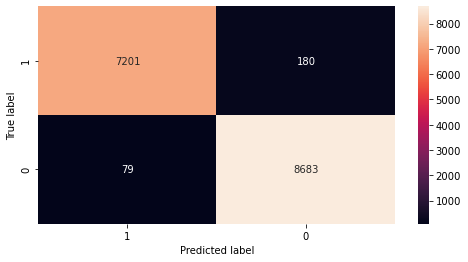

In [270]:
# visualize confusion matrix 

# Making confusion matrix
cm = confusion_matrix(test_y,logit_model.predict(test_X))[::-1, ::-1]

plt.figure(figsize=(8,4))

sns.heatmap(cm, annot=True, fmt='d',xticklabels = ["1", "0"] , yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### 2.Decision Tree classifier

In [184]:
# Tuning DT parameters
para_DT = {'max_depth':range(11,15),
          'min_samples_split':range(2,9),
          'min_samples_leaf':[50,60,70,80]
           }

DT_model = GridSearchCV(DecisionTreeClassifier(random_state=555),
                        param_grid=para_DT,
                        cv=10,
                        verbose=True,
                        n_jobs=-1,
                        scoring='roc_auc').fit(train_X,train_y)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


In [185]:
# get the best score and parameters
print('Best score: ', DT_model.best_score_)
print('Best parameters: ', DT_model.best_params_)

Best score:  0.9994550434327746
Best parameters:  {'max_depth': 13, 'min_samples_leaf': 70, 'min_samples_split': 2}


In [186]:
# Model using best parameters
DT_class = DT_model.best_estimator_

In [187]:
# predict the output probabilities
y_train_pred_proba = DT_class.predict_proba( train_X )[:, 1]
y_test_pred_proba = DT_class.predict_proba( test_X )[:, 1]

In [188]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(train_y,y_train_pred_proba))
dt_train = metrics.roc_auc_score(train_y,y_train_pred_proba)
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y,y_test_pred_proba))
dt_test = metrics.roc_auc_score(test_y,y_test_pred_proba)

Train ROC_AUC score: 0.9998204407009021
----------------------------------------
Test ROC_AUC score: 0.9996107995009055


In [189]:
# Classification report
print(metrics.classification_report(train_y,DT_class.predict(train_X)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20074
           1       1.00      0.99      0.99     17593

    accuracy                           0.99     37667
   macro avg       0.99      0.99      0.99     37667
weighted avg       0.99      0.99      0.99     37667



In [190]:
# Classification report for test data
print(metrics.classification_report(test_y,DT_class.predict(test_X)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      8762
           1       0.99      0.99      0.99      7381

    accuracy                           0.99     16143
   macro avg       0.99      0.99      0.99     16143
weighted avg       0.99      0.99      0.99     16143



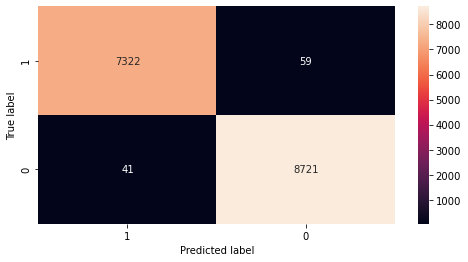

In [191]:
# visualize confusion matrix 

# Making confusion matrix
cm = confusion_matrix(test_y,DT_class.predict(test_X))[::-1, ::-1]

plt.figure(figsize=(8,4))

sns.heatmap(cm, annot=True, fmt='d',xticklabels = ["1", "0"] , yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### 3.Bagging classifier

In [192]:
# Hyperparameter tuning
Bagg_para = {'n_estimators':[10,20,30,40]}

Bagg_model = GridSearchCV(BaggingClassifier(oob_score=True,max_samples=0.8,random_state=555),
                          param_grid=Bagg_para,
                          cv=5,
                          n_jobs=-1,
                         verbose=True,
                         scoring='roc_auc').fit(train_X,train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [193]:
# get the best score and parameters
print('Best score: ', Bagg_model.best_score_)
print('Best parameters: ', Bagg_model.best_params_)

Best score:  0.9997076905932858
Best parameters:  {'n_estimators': 40}


In [194]:
# Model using best parameters
Bagg_class = Bagg_model.best_estimator_

In [195]:
# predict the output probabilities
y_train_pred_proba = Bagg_class.predict_proba( train_X )[:, 1]
y_test_pred_proba = Bagg_class.predict_proba( test_X )[:, 1]


In [196]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(train_y,y_train_pred_proba))
bagg_train = metrics.roc_auc_score(train_y,y_train_pred_proba)
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y,y_test_pred_proba))
bagg_test = metrics.roc_auc_score(test_y,y_test_pred_proba)

Train ROC_AUC score: 0.999999974515936
----------------------------------------
Test ROC_AUC score: 0.9998489152747602


In [197]:
# Classification report
print(metrics.classification_report(train_y,Bagg_class.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20074
           1       1.00      1.00      1.00     17593

    accuracy                           1.00     37667
   macro avg       1.00      1.00      1.00     37667
weighted avg       1.00      1.00      1.00     37667



In [198]:
# Classification report for test data
print(metrics.classification_report(test_y,Bagg_class.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8762
           1       1.00      1.00      1.00      7381

    accuracy                           1.00     16143
   macro avg       1.00      1.00      1.00     16143
weighted avg       1.00      1.00      1.00     16143



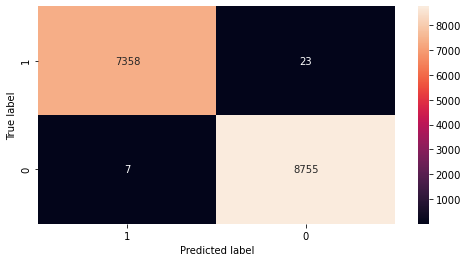

In [199]:
# visualize confusion matrix 

# Making confusion matrix
cm = confusion_matrix(test_y,Bagg_class.predict(test_X))[::-1, ::-1]

plt.figure(figsize=(8,4))

sns.heatmap(cm, annot=True, fmt='d',xticklabels = ["1", "0"] , yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#### 4.Random Forest Classifier

In [200]:
# Hyperparameter tuning
RF_para = {'n_estimators':range(100,251,50),
           'max_features':range(4,9)}
# Fitting the model
RF_model = GridSearchCV(RandomForestClassifier(random_state=555),
                       param_grid=RF_para,
                       cv=5,
                       n_jobs=-1,
                       verbose=True,
                       scoring='roc_auc').fit(train_X,train_y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [201]:
# get the best score and parameters
print('Best score: ', RF_model.best_score_)
print('Best parameters: ', RF_model.best_params_)

Best score:  0.9999812682635314
Best parameters:  {'max_features': 6, 'n_estimators': 150}


In [202]:
# Model using best parameters
RF_class = RF_model.best_estimator_

In [203]:
# predict the output probabilities
y_train_pred_proba = RF_class.predict_proba( train_X )[:, 1]
y_test_pred_proba = RF_class.predict_proba( test_X )[:, 1]

In [204]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(train_y,y_train_pred_proba))
RF_train = metrics.roc_auc_score(train_y,y_train_pred_proba)
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y,y_test_pred_proba))
RF_test = metrics.roc_auc_score(test_y,y_test_pred_proba)

Train ROC_AUC score: 1.0
----------------------------------------
Test ROC_AUC score: 0.9999909543993178


In [205]:
# Classification report
print(metrics.classification_report(train_y,RF_class.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20074
           1       1.00      1.00      1.00     17593

    accuracy                           1.00     37667
   macro avg       1.00      1.00      1.00     37667
weighted avg       1.00      1.00      1.00     37667



In [206]:
# Classification report for test data
print(metrics.classification_report(test_y,RF_class.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8762
           1       1.00      1.00      1.00      7381

    accuracy                           1.00     16143
   macro avg       1.00      1.00      1.00     16143
weighted avg       1.00      1.00      1.00     16143



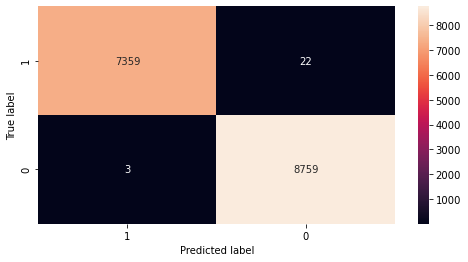

In [207]:
# visualize confusion matrix 

# Making confusion matrix
cm = confusion_matrix(test_y,RF_class.predict(test_X))[::-1, ::-1]

plt.figure(figsize=(8,4))

sns.heatmap(cm, annot=True, fmt='d',xticklabels = ["1", "0"] , yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### 5.KNN (K-Nearest Neighbors)

In [208]:
# Standardizing the data

sc = StandardScaler()
# Getting mean and std
X_std =  sc.fit(train_X)

# For train data
train_X_std = pd.DataFrame(X_std.transform(train_X),columns=train_X.columns)
# For test data
test_X_std = pd.DataFrame(X_std.transform(test_X),columns=test_X.columns)

In [209]:
# Hyper parameter tuning
KNN_para = {'n_neighbors':[5,6,7,8]}

# Fitting the model
KNN_model = GridSearchCV(KNeighborsClassifier(),
                        param_grid=KNN_para,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1,
                        verbose=10).fit(train_X_std,train_y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


In [210]:
# get the best score and parameters
print('Best score: ', KNN_model.best_score_)
print('Best parameters: ', KNN_model.best_params_)

Best score:  0.9987594747109958
Best parameters:  {'n_neighbors': 8}


In [211]:
# Model using best parameters
KNN_class = KNN_model.best_estimator_

In [212]:
# predict the output probabilities
y_train_pred_proba = KNN_class.predict_proba( train_X_std )[:, 1]
y_test_pred_proba = KNN_class.predict_proba( test_X_std )[:, 1]

In [213]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(train_y,y_train_pred_proba))
KNN_train = metrics.roc_auc_score(train_y,y_train_pred_proba)
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y,y_test_pred_proba))
KNN_test = metrics.roc_auc_score(test_y,y_test_pred_proba)

Train ROC_AUC score: 0.9999643095683809
----------------------------------------
Test ROC_AUC score: 0.9985552629454066


In [214]:
# Classification report
print(metrics.classification_report(train_y,KNN_class.predict(train_X_std)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20074
           1       1.00      0.99      1.00     17593

    accuracy                           1.00     37667
   macro avg       1.00      1.00      1.00     37667
weighted avg       1.00      1.00      1.00     37667



In [215]:
# Classification report for test data
print(metrics.classification_report(test_y,KNN_class.predict(test_X_std)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      8762
           1       1.00      0.99      0.99      7381

    accuracy                           1.00     16143
   macro avg       1.00      0.99      1.00     16143
weighted avg       1.00      1.00      1.00     16143



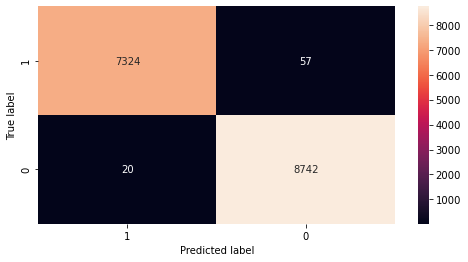

In [216]:
# visualize confusion matrix 

# Making confusion matrix
cm = confusion_matrix(test_y,KNN_class.predict(test_X_std))[::-1, ::-1]

plt.figure(figsize=(8,4))

sns.heatmap(cm, annot=True, fmt='d',xticklabels = ["1", "0"] , yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### 6.GBM classifier

In [217]:
# Hyperparameter tuning
GBM_para = {'n_estimators':[200,250,300,350],
           'learning_rate':[0.01,0.1,1],
           'max_features':[5,6,7,8]}

GBM_model = GridSearchCV(GradientBoostingClassifier(random_state=123),
                        param_grid=GBM_para,
                        n_jobs=-1,
                         cv=5,
                        scoring='roc_auc',
                        verbose=True).fit(train_X,train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [218]:
# get the best score and parameters
print('Best score: ', GBM_model.best_score_)
print('Best parameters: ', GBM_model.best_params_)

Best score:  0.9999531787006596
Best parameters:  {'learning_rate': 0.1, 'max_features': 7, 'n_estimators': 350}


In [219]:
# Model using best parameters
GBM_class = GBM_model.best_estimator_

In [220]:
# predict the output probabilities
y_train_pred_proba = GBM_class.predict_proba( train_X )[:, 1]
y_test_pred_proba = GBM_class.predict_proba( test_X )[:, 1]

In [221]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(train_y,y_train_pred_proba))
GBM_train = metrics.roc_auc_score(train_y,y_train_pred_proba)
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y,y_test_pred_proba))
GBM_test = metrics.roc_auc_score(test_y,y_test_pred_proba)

Train ROC_AUC score: 0.9999998414324907
----------------------------------------
Test ROC_AUC score: 0.9999406237493684


In [222]:
# Classification report
print(metrics.classification_report(train_y,GBM_class.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20074
           1       1.00      1.00      1.00     17593

    accuracy                           1.00     37667
   macro avg       1.00      1.00      1.00     37667
weighted avg       1.00      1.00      1.00     37667



In [223]:
# Classification report for test data
print(metrics.classification_report(test_y,GBM_class.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8762
           1       1.00      1.00      1.00      7381

    accuracy                           1.00     16143
   macro avg       1.00      1.00      1.00     16143
weighted avg       1.00      1.00      1.00     16143



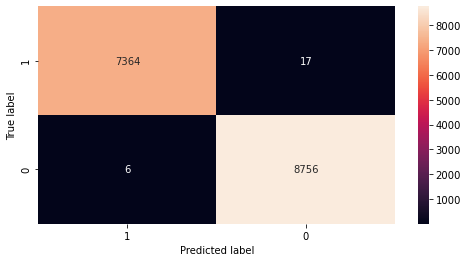

In [224]:
# visualize confusion matrix 

# Making confusion matrix
cm = confusion_matrix(test_y,GBM_class.predict(test_X))[::-1, ::-1]

plt.figure(figsize=(8,4))

sns.heatmap(cm, annot=True, fmt='d',xticklabels = ["1", "0"] , yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### 6.Ada Boost classifier

In [225]:
# Hyperparameter tuning
AB_para = {'n_estimators':[75,100,125],
           'learning_rate':[0.1,1,10]}

AB_model = GridSearchCV(AdaBoostClassifier(random_state=123),
                        param_grid=AB_para,
                        n_jobs=-1,
                         cv=5,
                        scoring='roc_auc',
                        verbose=True).fit(train_X,train_y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [226]:
# get the best score and parameters
print('Best score: ', AB_model.best_score_)
print('Best parameters: ', AB_model.best_params_)

Best score:  0.9998326170680805
Best parameters:  {'learning_rate': 1, 'n_estimators': 100}


In [227]:
# Model using best parameters
AB_class = AB_model.best_estimator_

In [228]:
# predict the output probabilities
y_train_pred_proba = AB_class.predict_proba( train_X )[:, 1]
y_test_pred_proba = AB_class.predict_proba( test_X )[:, 1]

In [229]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(train_y,y_train_pred_proba))
AB_train = metrics.roc_auc_score(train_y,y_train_pred_proba)
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y,y_test_pred_proba))
AB_test = metrics.roc_auc_score(test_y,y_test_pred_proba)

Train ROC_AUC score: 0.999927875851562
----------------------------------------
Test ROC_AUC score: 0.9999009931945849


In [230]:
# Classification report
print(metrics.classification_report(train_y,AB_class.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20074
           1       1.00      0.99      1.00     17593

    accuracy                           1.00     37667
   macro avg       1.00      1.00      1.00     37667
weighted avg       1.00      1.00      1.00     37667



In [231]:
# Classification report for test data
print(metrics.classification_report(test_y,AB_class.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8762
           1       1.00      0.99      0.99      7381

    accuracy                           1.00     16143
   macro avg       1.00      1.00      1.00     16143
weighted avg       1.00      1.00      1.00     16143



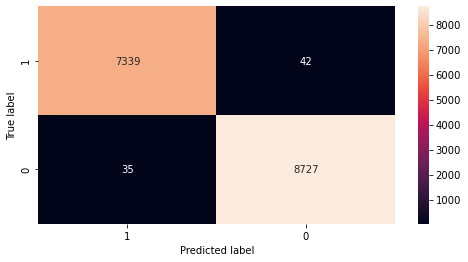

In [232]:
# visualize confusion matrix 

# Making confusion matrix
cm = confusion_matrix(test_y,AB_class.predict(test_X))[::-1, ::-1]

plt.figure(figsize=(8,4))

sns.heatmap(cm, annot=True, fmt='d',xticklabels = ["1", "0"] , yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### 7.Naives Bayes Classifier

In [234]:
NB_model = GaussianNB()
NB_class = NB_model.fit(train_X,train_y)

In [235]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(train_y,NB_class.predict(train_X)))
NB_train = metrics.roc_auc_score(train_y,NB_class.predict(train_X))
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y,NB_class.predict(test_X)))
NB_test = metrics.roc_auc_score(test_y,NB_class.predict(test_X))

Train ROC_AUC score: 0.9640360068644102
----------------------------------------
Test ROC_AUC score: 0.9636777460997922


In [236]:
# Classification report for train data
print(metrics.classification_report(train_y,NB_class.predict(train_X)))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97     20074
           1       0.96      0.97      0.96     17593

    accuracy                           0.96     37667
   macro avg       0.96      0.96      0.96     37667
weighted avg       0.96      0.96      0.96     37667



In [237]:
# Classification report for test data
print(metrics.classification_report(test_y,NB_class.predict(test_X)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8762
           1       0.96      0.96      0.96      7381

    accuracy                           0.96     16143
   macro avg       0.96      0.96      0.96     16143
weighted avg       0.96      0.96      0.96     16143



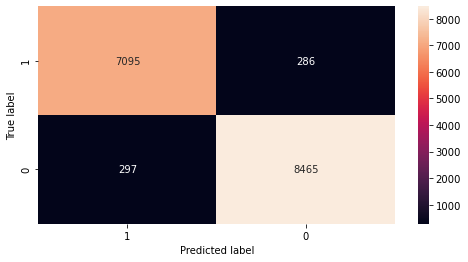

In [238]:
# visualize confusion matrix 

# Making confusion matrix
cm = confusion_matrix(test_y,NB_class.predict(test_X))[::-1, ::-1]

plt.figure(figsize=(8,4))

sns.heatmap(cm, annot=True, fmt='d',xticklabels = ["1", "0"] , yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### 8.Support Vector  Classifier (SVC)

In [156]:
# initialize the model
m_SVC = SVC(kernel='rbf', class_weight='balanced',probability=True)
# tuning parameters
params = {'C': [1,5,10], 
             'gamma': [0.0001, 0.0005, 0.001, 0.005] }

# grid search and cv
model_gcv = GridSearchCV( estimator = m_SVC, 
                         param_grid = params, 
                         cv = 5, 
                         n_jobs = -1, 
                         verbose = 10,
                         scoring = 'roc_auc').fit( train_X,train_y )

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [157]:
# get the best score and parameters
print('Best score: ', model_gcv.best_score_)
print('Best parameters: ', model_gcv.best_params_)

Best score:  0.9977689588481843
Best parameters:  {'C': 10, 'gamma': 0.005}


In [158]:
# Model using best parameters
SVC_class = model_gcv.best_estimator_

In [329]:
# predict the output probabilities
y_train_pred_proba = SVC_class.predict_proba( train_X )[:, 1]
y_test_pred_proba = SVC_class.predict_proba( test_X )[:, 1]

In [171]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(train_y,y_train_pred_proba))
svc_train = metrics.roc_auc_score(train_y,y_train_pred_proba)
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y,y_test_pred_proba))
svc_test = metrics.roc_auc_score(test_y,y_test_pred_proba)

Train ROC_AUC score: 0.999927875851562
----------------------------------------
Test ROC_AUC score: 0.9999009931945849


In [160]:
# Classification report
print(metrics.classification_report(train_y,SVC_class.predict(train_X)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     20074
           1       0.99      0.97      0.98     17593

    accuracy                           0.98     37667
   macro avg       0.98      0.98      0.98     37667
weighted avg       0.98      0.98      0.98     37667



In [161]:
# Classification report for test data
print(metrics.classification_report(test_y,SVC_class.predict(test_X)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8762
           1       0.99      0.97      0.98      7381

    accuracy                           0.98     16143
   macro avg       0.98      0.98      0.98     16143
weighted avg       0.98      0.98      0.98     16143



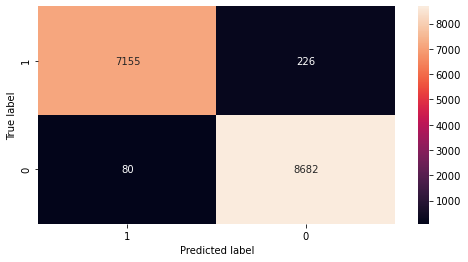

In [162]:
# visualize confusion matrix 

# Making confusion matrix
cm = confusion_matrix(test_y,SVC_class.predict(test_X))[::-1, ::-1]

plt.figure(figsize=(8,4))

sns.heatmap(cm, annot=True, fmt='d',xticklabels = ["1", "0"] , yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

##### 9.XG Boost classifier

In [312]:
from xgboost import XGBClassifier

In [239]:
XGB_param = {'n_estimators': [50, 100, 200],
                    'learning_rate': [10 ** x for x in range(-2, 1)],
                        'max_features': [ 4, 5, 6]}

XGB_model =  GridSearchCV(estimator=XGBClassifier(),
                         param_grid=XGB_param,
                          cv=5,
                         scoring='roc_auc',
                         n_jobs=-1,
                         verbose=True).fit(train_X,train_y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[20:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:06:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [240]:
# get the best score and parameters
print('Best score: ', XGB_model.best_score_)
print('Best parameters: ', XGB_model.best_params_)

Best score:  0.9999744665974315
Best parameters:  {'learning_rate': 0.1, 'max_features': 4, 'n_estimators': 200}


In [241]:
# Model using best parameters
XGB_class = XGB_model.best_estimator_

In [242]:
# predict the output probabilities
y_train_pred_proba = XGB_class.predict_proba( train_X )[:, 1]
y_test_pred_proba = XGB_class.predict_proba( test_X )[:, 1]

In [243]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(train_y,y_train_pred_proba))
XGB_train = metrics.roc_auc_score(train_y,y_train_pred_proba)
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y,y_test_pred_proba))
XGB_test = metrics.roc_auc_score(train_y,y_train_pred_proba)

Train ROC_AUC score: 0.9999999858421866
----------------------------------------
Test ROC_AUC score: 0.9999852177876032


In [244]:
# Classification report
print(metrics.classification_report(train_y,XGB_class.predict(train_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20074
           1       1.00      1.00      1.00     17593

    accuracy                           1.00     37667
   macro avg       1.00      1.00      1.00     37667
weighted avg       1.00      1.00      1.00     37667



In [245]:
# Classification report for test data
print(metrics.classification_report(test_y,XGB_class.predict(test_X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8762
           1       1.00      1.00      1.00      7381

    accuracy                           1.00     16143
   macro avg       1.00      1.00      1.00     16143
weighted avg       1.00      1.00      1.00     16143



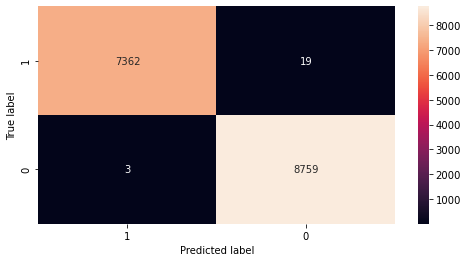

In [246]:
# visualize confusion matrix 

# Making confusion matrix
cm = confusion_matrix(test_y,XGB_class.predict(test_X))[::-1, ::-1]

plt.figure(figsize=(8,4))

sns.heatmap(cm, annot=True, fmt='d',xticklabels = ["1", "0"] , yticklabels = ["1", "0"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [297]:
# Comparing all the models
Binary_model_comparison = pd.DataFrame()
Binary_model_comparison['Algorithm'] = ['Logistic Regression ','Decision Tree Classifier','Bagging Classifier',
                                         'Random Forest Classifier','Adaboost Classifier','GBM Classifier','XGBoost Classifier',
                                         'KNN Classifier','Support Vector Classifier','Naive Bayes Classifier']

Binary_model_comparison['Train ROC_AUC'] =pd.Series([logit_train,dt_train,bagg_train,RF_train,
                                                   AB_train,GBM_train,XGB_train,XGB_train,svc_train,NB_train])

Binary_model_comparison['Test ROC_AUC'] = pd.Series([logit_test,dt_test,bagg_test,RF_test,AB_test,GBM_test,XGB_test,
                                                    KNN_test,svc_test,NB_test])

Binary_model_comparison.sort_values(by = ['Train ROC_AUC','Test ROC_AUC'],ascending=False)

Algorithm  Train ROC_AUC  Test ROC_AUC
3   Random Forest Classifier       1.000000      0.999991
6         XGBoost Classifier       1.000000      1.000000
7             KNN Classifier       1.000000      0.998555
2         Bagging Classifier       1.000000      0.999849
5             GBM Classifier       1.000000      0.999941
4        Adaboost Classifier       0.999928      0.999901
8  Support Vector Classifier       0.999928      0.999901
1   Decision Tree Classifier       0.999820      0.999611
0       Logistic Regression        0.998134      0.998000
9     Naive Bayes Classifier       0.964036      0.963678

### Multinomial Classification

In [254]:
# 1.Train test split
train_X_m,test_X_m,train_y_m,test_y_m = train_test_split(main_df[final_imp_var],main_df.loc[:,'Multi_Attack'],
                                            test_size=0.3,random_state=123)

In [255]:
train_y_m.value_counts()/train_y_m.shape[0]
# Highly imbalanced data 
# Need to balance data before model building

0     0.532933
5     0.214166
9     0.093212
10    0.055778
7     0.054371
6     0.029150
1     0.018584
4     0.001009
2     0.000478
8     0.000186
3     0.000133
Name: Multi_Attack, dtype: float64

In [256]:
# Balancing the data using Synthetic Minority Oversampling Technique (SMOTE)
smote =SMOTE(random_state=123,k_neighbors=2)
X_smote_train, y_smote_train = smote.fit_resample(train_X_m,train_y_m)

In [257]:
# Target variable before and after oversampling.
from collections import Counter
print('Original dataset shape {}'.format(Counter(train_y_m)))
print('_'*100)
print('Oversampled dataset shape {}'.format(Counter(y_smote_train)))

Original dataset shape Counter({0: 20074, 5: 8067, 9: 3511, 10: 2101, 7: 2048, 6: 1098, 1: 700, 4: 38, 2: 18, 8: 7, 3: 5})
____________________________________________________________________________________________________
Oversampled dataset shape Counter({10: 20074, 9: 20074, 0: 20074, 5: 20074, 7: 20074, 6: 20074, 1: 20074, 4: 20074, 2: 20074, 3: 20074, 8: 20074})


In [258]:
# Before and after sampling
print("Shape Of train data before Sampling",train_X_m.shape)
print('-'*50)
print("Shape Of train data after Sampling",X_smote_train.shape)
print('-'*50)
print(' NOTE:Test data remains same before and after sampling')

Shape Of train data before Sampling (37667, 14)
--------------------------------------------------
Shape Of train data after Sampling (220814, 14)
--------------------------------------------------
 NOTE:Test data remains same before and after sampling


### Algorithms  used for multinomial classification
        1. NB
        2. Light GBM 
        3. Catboost
        4. SVM
        5. KNN

#### 1.Naive Bayes Classifier

In [259]:
NB_model = GaussianNB()
NB_class = NB_model.fit(X_smote_train,y_smote_train)

In [260]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(y_smote_train,NB_class.predict_proba(X_smote_train),multi_class='ovo'))
NB_M_train = metrics.roc_auc_score(y_smote_train,NB_class.predict_proba(X_smote_train),multi_class='ovo')
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y_m,NB_class.predict_proba(test_X_m),multi_class='ovo'))
NB_M_test = metrics.roc_auc_score(test_y_m,NB_class.predict_proba(test_X_m),multi_class='ovo')

Train ROC_AUC score: 0.9943741348745672
----------------------------------------
Test ROC_AUC score: 0.9744601290325184


In [261]:
# Classification report for train data
print(metrics.classification_report(y_smote_train,NB_class.predict(X_smote_train)))

              precision    recall  f1-score   support

           0       0.97      0.48      0.64     20074
           1       1.00      1.00      1.00     20074
           2       0.83      1.00      0.90     20074
           3       0.81      1.00      0.90     20074
           4       1.00      1.00      1.00     20074
           5       0.98      0.99      0.99     20074
           6       0.80      0.98      0.89     20074
           7       0.96      0.86      0.91     20074
           8       0.94      0.99      0.97     20074
           9       0.85      0.74      0.79     20074
          10       1.00      1.00      1.00     20074

    accuracy                           0.91    220814
   macro avg       0.92      0.91      0.91    220814
weighted avg       0.92      0.91      0.91    220814



In [262]:
# Classification report for test data
print(metrics.classification_report(test_y_m,NB_class.predict(test_X_m)))

              precision    recall  f1-score   support

           0       1.00      0.48      0.64      8762
           1       1.00      1.00      1.00       268
           2       0.01      0.83      0.01        12
           3       0.00      1.00      0.00         3
           4       1.00      0.80      0.89        15
           5       1.00      0.99      1.00      3294
           6       0.51      0.98      0.67       456
           7       0.92      0.83      0.87       916
           8       0.00      0.67      0.01         3
           9       0.83      0.74      0.78      1508
          10       0.98      1.00      0.99       906

    accuracy                           0.68     16143
   macro avg       0.66      0.85      0.62     16143
weighted avg       0.96      0.68      0.77     16143



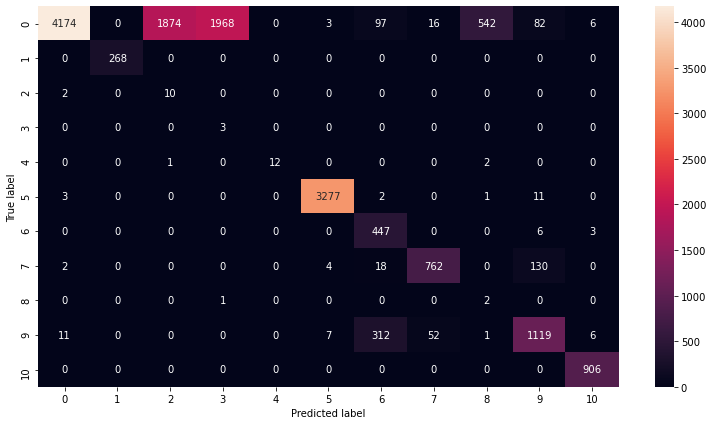

In [263]:
# Visualizing confusion matrix
cm =confusion_matrix(test_y_m,NB_class.predict(test_X_m))
plt.figure(figsize=(13,7))

sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [131]:
# Saving NB classifier model
#with open('cyber_NB','wb') as model:
#    pickle.dump(NB_class,model)

#### 2.Light GBM classifier

In [264]:
from lightgbm import LGBMClassifier

In [265]:
LGBM_model = LGBMClassifier(objective='multiclass',
                          num_class=11).fit(X_smote_train,y_smote_train)

In [266]:
# predict the output probabilities
y_train_pred_proba = LGBM_model.predict_proba( X_smote_train )
y_test_pred_proba = LGBM_model.predict_proba( test_X_m )

In [268]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(y_smote_train,LGBM_model.predict_proba(X_smote_train),multi_class='ovo'))
lgbm_train = metrics.roc_auc_score(y_smote_train,LGBM_model.predict_proba(X_smote_train),multi_class='ovo')
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y_m,LGBM_model.predict_proba(test_X_m),multi_class='ovo'))
lgbm_test = metrics.roc_auc_score(test_y_m,LGBM_model.predict_proba(test_X_m),multi_class='ovo')

Train ROC_AUC score: 0.9999997831305303
----------------------------------------
Test ROC_AUC score: 0.9943454977505918


In [269]:
# Classification report for train data
print(metrics.classification_report(y_smote_train,LGBM_model.predict(X_smote_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20074
           1       1.00      1.00      1.00     20074
           2       1.00      1.00      1.00     20074
           3       1.00      1.00      1.00     20074
           4       1.00      1.00      1.00     20074
           5       1.00      1.00      1.00     20074
           6       1.00      1.00      1.00     20074
           7       1.00      1.00      1.00     20074
           8       1.00      1.00      1.00     20074
           9       1.00      1.00      1.00     20074
          10       1.00      1.00      1.00     20074

    accuracy                           1.00    220814
   macro avg       1.00      1.00      1.00    220814
weighted avg       1.00      1.00      1.00    220814



In [270]:
# Classification report for test data
print(metrics.classification_report(test_y_m,LGBM_model.predict(test_X_m)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8762
           1       1.00      1.00      1.00       268
           2       0.90      0.75      0.82        12
           3       1.00      1.00      1.00         3
           4       1.00      0.80      0.89        15
           5       1.00      1.00      1.00      3294
           6       0.98      0.99      0.99       456
           7       0.99      0.99      0.99       916
           8       0.11      0.33      0.17         3
           9       1.00      0.99      1.00      1508
          10       1.00      1.00      1.00       906

    accuracy                           1.00     16143
   macro avg       0.91      0.90      0.89     16143
weighted avg       1.00      1.00      1.00     16143



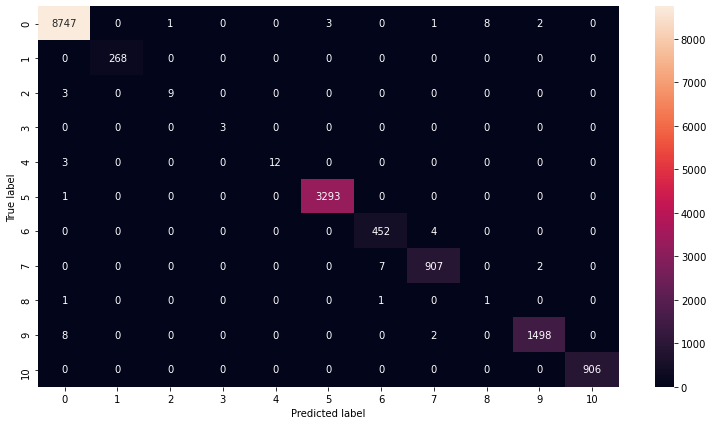

In [271]:
# Visualizing confusion matrix
cm =confusion_matrix(test_y_m,LGBM_model.predict(test_X_m))
plt.figure(figsize=(13,7))

sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Saving Light GBM classifier model
#with open('cyber_LGBM','wb') as model:
#    pickle.dump(GBM_model,model)

#### 3.Cat boost classifier

In [272]:
from catboost import CatBoostClassifier,Pool

In [273]:
cb_model = CatBoostClassifier(classes_count=11,
                             loss_function='MultiClass').fit(X_smote_train,y_smote_train)

Learning rate set to 0.1042
0:	learn: 1.6829054	total: 259ms	remaining: 4m 18s
1:	learn: 1.3440436	total: 367ms	remaining: 3m 3s
2:	learn: 1.1691317	total: 474ms	remaining: 2m 37s
3:	learn: 1.0017442	total: 583ms	remaining: 2m 25s
4:	learn: 0.8700907	total: 691ms	remaining: 2m 17s
5:	learn: 0.7701775	total: 800ms	remaining: 2m 12s
6:	learn: 0.6876341	total: 908ms	remaining: 2m 8s
7:	learn: 0.6156994	total: 1.02s	remaining: 2m 6s
8:	learn: 0.5581803	total: 1.13s	remaining: 2m 4s
9:	learn: 0.5064969	total: 1.25s	remaining: 2m 3s
10:	learn: 0.4566372	total: 1.36s	remaining: 2m 2s
11:	learn: 0.4157563	total: 1.47s	remaining: 2m
12:	learn: 0.3822238	total: 1.58s	remaining: 1m 59s
13:	learn: 0.3509569	total: 1.69s	remaining: 1m 58s
14:	learn: 0.3208222	total: 1.8s	remaining: 1m 58s
15:	learn: 0.2940341	total: 1.91s	remaining: 1m 57s
16:	learn: 0.2677336	total: 2.01s	remaining: 1m 56s
17:	learn: 0.2460288	total: 2.12s	remaining: 1m 55s
18:	learn: 0.2263919	total: 2.23s	remaining: 1m 55s
19:	l

158:	learn: 0.0048908	total: 17.5s	remaining: 1m 32s
159:	learn: 0.0048414	total: 17.6s	remaining: 1m 32s
160:	learn: 0.0047866	total: 17.7s	remaining: 1m 32s
161:	learn: 0.0047528	total: 17.8s	remaining: 1m 32s
162:	learn: 0.0047217	total: 18s	remaining: 1m 32s
163:	learn: 0.0046753	total: 18.1s	remaining: 1m 32s
164:	learn: 0.0046347	total: 18.2s	remaining: 1m 31s
165:	learn: 0.0045988	total: 18.3s	remaining: 1m 31s
166:	learn: 0.0045691	total: 18.4s	remaining: 1m 31s
167:	learn: 0.0045311	total: 18.5s	remaining: 1m 31s
168:	learn: 0.0044814	total: 18.6s	remaining: 1m 31s
169:	learn: 0.0044651	total: 18.7s	remaining: 1m 31s
170:	learn: 0.0044276	total: 18.8s	remaining: 1m 31s
171:	learn: 0.0043891	total: 18.9s	remaining: 1m 31s
172:	learn: 0.0043631	total: 19s	remaining: 1m 30s
173:	learn: 0.0043276	total: 19.1s	remaining: 1m 30s
174:	learn: 0.0042947	total: 19.2s	remaining: 1m 30s
175:	learn: 0.0042676	total: 19.4s	remaining: 1m 30s
176:	learn: 0.0042309	total: 19.5s	remaining: 1m 3

314:	learn: 0.0022138	total: 34.4s	remaining: 1m 14s
315:	learn: 0.0022067	total: 34.5s	remaining: 1m 14s
316:	learn: 0.0022021	total: 34.6s	remaining: 1m 14s
317:	learn: 0.0021967	total: 34.7s	remaining: 1m 14s
318:	learn: 0.0021912	total: 34.8s	remaining: 1m 14s
319:	learn: 0.0021851	total: 34.9s	remaining: 1m 14s
320:	learn: 0.0021729	total: 35s	remaining: 1m 14s
321:	learn: 0.0021686	total: 35.1s	remaining: 1m 13s
322:	learn: 0.0021587	total: 35.2s	remaining: 1m 13s
323:	learn: 0.0021513	total: 35.3s	remaining: 1m 13s
324:	learn: 0.0021477	total: 35.4s	remaining: 1m 13s
325:	learn: 0.0021443	total: 35.5s	remaining: 1m 13s
326:	learn: 0.0021415	total: 35.6s	remaining: 1m 13s
327:	learn: 0.0021340	total: 35.8s	remaining: 1m 13s
328:	learn: 0.0021282	total: 35.9s	remaining: 1m 13s
329:	learn: 0.0021238	total: 36s	remaining: 1m 13s
330:	learn: 0.0021186	total: 36.1s	remaining: 1m 12s
331:	learn: 0.0021143	total: 36.2s	remaining: 1m 12s
332:	learn: 0.0021073	total: 36.3s	remaining: 1m 1

473:	learn: 0.0014972	total: 51.6s	remaining: 57.2s
474:	learn: 0.0014943	total: 51.7s	remaining: 57.1s
475:	learn: 0.0014928	total: 51.8s	remaining: 57s
476:	learn: 0.0014892	total: 51.9s	remaining: 56.9s
477:	learn: 0.0014815	total: 52s	remaining: 56.8s
478:	learn: 0.0014794	total: 52.1s	remaining: 56.7s
479:	learn: 0.0014779	total: 52.2s	remaining: 56.5s
480:	learn: 0.0014771	total: 52.3s	remaining: 56.4s
481:	learn: 0.0014759	total: 52.4s	remaining: 56.3s
482:	learn: 0.0014718	total: 52.5s	remaining: 56.2s
483:	learn: 0.0014708	total: 52.6s	remaining: 56.1s
484:	learn: 0.0014698	total: 52.7s	remaining: 56s
485:	learn: 0.0014689	total: 52.8s	remaining: 55.9s
486:	learn: 0.0014644	total: 53s	remaining: 55.8s
487:	learn: 0.0014635	total: 53.1s	remaining: 55.7s
488:	learn: 0.0014626	total: 53.2s	remaining: 55.6s
489:	learn: 0.0014612	total: 53.3s	remaining: 55.5s
490:	learn: 0.0014588	total: 53.4s	remaining: 55.3s
491:	learn: 0.0014573	total: 53.5s	remaining: 55.2s
492:	learn: 0.001454

634:	learn: 0.0011951	total: 1m 9s	remaining: 39.8s
635:	learn: 0.0011935	total: 1m 9s	remaining: 39.6s
636:	learn: 0.0011930	total: 1m 9s	remaining: 39.5s
637:	learn: 0.0011925	total: 1m 9s	remaining: 39.4s
638:	learn: 0.0011910	total: 1m 9s	remaining: 39.3s
639:	learn: 0.0011900	total: 1m 9s	remaining: 39.2s
640:	learn: 0.0011885	total: 1m 9s	remaining: 39.1s
641:	learn: 0.0011870	total: 1m 9s	remaining: 39s
642:	learn: 0.0011857	total: 1m 10s	remaining: 38.9s
643:	learn: 0.0011833	total: 1m 10s	remaining: 38.8s
644:	learn: 0.0011825	total: 1m 10s	remaining: 38.7s
645:	learn: 0.0011812	total: 1m 10s	remaining: 38.5s
646:	learn: 0.0011769	total: 1m 10s	remaining: 38.4s
647:	learn: 0.0011763	total: 1m 10s	remaining: 38.3s
648:	learn: 0.0011742	total: 1m 10s	remaining: 38.2s
649:	learn: 0.0011733	total: 1m 10s	remaining: 38.1s
650:	learn: 0.0011729	total: 1m 10s	remaining: 38s
651:	learn: 0.0011720	total: 1m 10s	remaining: 37.9s
652:	learn: 0.0011715	total: 1m 11s	remaining: 37.8s
653:	

790:	learn: 0.0010407	total: 1m 26s	remaining: 22.8s
791:	learn: 0.0010405	total: 1m 26s	remaining: 22.7s
792:	learn: 0.0010399	total: 1m 26s	remaining: 22.6s
793:	learn: 0.0010386	total: 1m 26s	remaining: 22.5s
794:	learn: 0.0010384	total: 1m 26s	remaining: 22.4s
795:	learn: 0.0010380	total: 1m 26s	remaining: 22.3s
796:	learn: 0.0010366	total: 1m 26s	remaining: 22.1s
797:	learn: 0.0010363	total: 1m 27s	remaining: 22s
798:	learn: 0.0010353	total: 1m 27s	remaining: 21.9s
799:	learn: 0.0010336	total: 1m 27s	remaining: 21.8s
800:	learn: 0.0010328	total: 1m 27s	remaining: 21.7s
801:	learn: 0.0010315	total: 1m 27s	remaining: 21.6s
802:	learn: 0.0010313	total: 1m 27s	remaining: 21.5s
803:	learn: 0.0010289	total: 1m 27s	remaining: 21.4s
804:	learn: 0.0010288	total: 1m 27s	remaining: 21.3s
805:	learn: 0.0010279	total: 1m 27s	remaining: 21.2s
806:	learn: 0.0010273	total: 1m 28s	remaining: 21.1s
807:	learn: 0.0010266	total: 1m 28s	remaining: 21s
808:	learn: 0.0010264	total: 1m 28s	remaining: 20.

947:	learn: 0.0009360	total: 1m 43s	remaining: 5.68s
948:	learn: 0.0009342	total: 1m 43s	remaining: 5.57s
949:	learn: 0.0009340	total: 1m 43s	remaining: 5.46s
950:	learn: 0.0009336	total: 1m 43s	remaining: 5.36s
951:	learn: 0.0009334	total: 1m 44s	remaining: 5.25s
952:	learn: 0.0009307	total: 1m 44s	remaining: 5.14s
953:	learn: 0.0009294	total: 1m 44s	remaining: 5.03s
954:	learn: 0.0009288	total: 1m 44s	remaining: 4.92s
955:	learn: 0.0009284	total: 1m 44s	remaining: 4.81s
956:	learn: 0.0009281	total: 1m 44s	remaining: 4.7s
957:	learn: 0.0009279	total: 1m 44s	remaining: 4.59s
958:	learn: 0.0009270	total: 1m 44s	remaining: 4.48s
959:	learn: 0.0009268	total: 1m 44s	remaining: 4.37s
960:	learn: 0.0009256	total: 1m 45s	remaining: 4.26s
961:	learn: 0.0009234	total: 1m 45s	remaining: 4.15s
962:	learn: 0.0009233	total: 1m 45s	remaining: 4.04s
963:	learn: 0.0009211	total: 1m 45s	remaining: 3.94s
964:	learn: 0.0009202	total: 1m 45s	remaining: 3.83s
965:	learn: 0.0009199	total: 1m 45s	remaining: 

In [274]:
# predict the output probabilities
y_train_pred_proba = cb_model.predict_proba( X_smote_train )
y_test_pred_proba = cb_model.predict_proba( test_X_m )

In [275]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(y_smote_train,cb_model.predict_proba(X_smote_train),multi_class='ovo'))
cb_train = metrics.roc_auc_score(y_smote_train,cb_model.predict_proba(X_smote_train),multi_class='ovo')
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y_m,cb_model.predict_proba(test_X_m),multi_class='ovo'))
cb_test = metrics.roc_auc_score(test_y_m,cb_model.predict_proba(test_X_m),multi_class='ovo')

Train ROC_AUC score: 0.9999996722254734
----------------------------------------
Test ROC_AUC score: 0.998330101817769


In [276]:
# Classification report for train data
print(metrics.classification_report(y_smote_train,cb_model.predict(X_smote_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20074
           1       1.00      1.00      1.00     20074
           2       1.00      1.00      1.00     20074
           3       1.00      1.00      1.00     20074
           4       1.00      1.00      1.00     20074
           5       1.00      1.00      1.00     20074
           6       1.00      1.00      1.00     20074
           7       1.00      1.00      1.00     20074
           8       1.00      1.00      1.00     20074
           9       1.00      1.00      1.00     20074
          10       1.00      1.00      1.00     20074

    accuracy                           1.00    220814
   macro avg       1.00      1.00      1.00    220814
weighted avg       1.00      1.00      1.00    220814



In [277]:
# Classification report for test data
print(metrics.classification_report(test_y_m,cb_model.predict(test_X_m)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8762
           1       1.00      1.00      1.00       268
           2       0.92      0.92      0.92        12
           3       1.00      1.00      1.00         3
           4       1.00      0.80      0.89        15
           5       1.00      1.00      1.00      3294
           6       0.99      0.99      0.99       456
           7       0.99      0.99      0.99       916
           8       0.07      0.33      0.11         3
           9       1.00      0.99      1.00      1508
          10       1.00      1.00      1.00       906

    accuracy                           1.00     16143
   macro avg       0.90      0.91      0.90     16143
weighted avg       1.00      1.00      1.00     16143



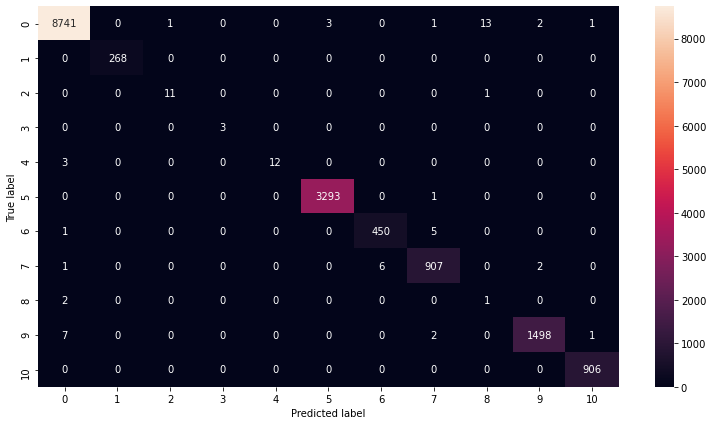

In [278]:
# Visualizing confusion matrix
cm =confusion_matrix(test_y_m,cb_model.predict(test_X_m))
plt.figure(figsize=(13,7))

sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
# Saving Catboost classifier model
#with open('cyber_CB','wb') as model:
#    pickle.dump(cb_model,model)

#### 4.KNN

In [279]:
# Standardizing the data

sc = StandardScaler()
# Getting mean and std
X_std_m =  sc.fit(X_smote_train)

# For train data
train_X_std_m = pd.DataFrame(X_std_m.transform(X_smote_train),columns=X_smote_train.columns)
# For test data
test_X_std_m = pd.DataFrame(X_std_m.transform(test_X_m),columns=test_X_m.columns)

In [284]:
# Hyper parameter tuning
KNN_para = {'n_neighbors':[4,5,6],
           'weights':['uniform']}

# Fitting the model
KNN_model = GridSearchCV(KNeighborsClassifier(),
                        param_grid=KNN_para,
                        scoring='roc_auc',
                        cv=5,
                        n_jobs=-1,
                        verbose=True).fit(X_smote_train,y_smote_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [285]:
# get the best  parameters
print('Best parameters: ', KNN_model.best_params_)

Best parameters:  {'n_neighbors': 4, 'weights': 'uniform'}


In [286]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(y_smote_train,KNN_model.predict_proba(X_smote_train),multi_class='ovo'))
knn_m_train = metrics.roc_auc_score(y_smote_train,KNN_model.predict_proba(X_smote_train),multi_class='ovo')
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y_m,KNN_model.predict_proba(test_X_m),multi_class='ovo'))
knn_m_test = metrics.roc_auc_score(test_y_m,KNN_model.predict_proba(test_X_m),multi_class='ovo')

Train ROC_AUC score: 0.9999946323847444
----------------------------------------
Test ROC_AUC score: 0.9422466800364059


In [287]:
# Classification report for train data
print(metrics.classification_report(y_smote_train,KNN_model.predict(X_smote_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20074
           1       1.00      1.00      1.00     20074
           2       1.00      1.00      1.00     20074
           3       1.00      1.00      1.00     20074
           4       1.00      1.00      1.00     20074
           5       1.00      1.00      1.00     20074
           6       1.00      1.00      1.00     20074
           7       1.00      1.00      1.00     20074
           8       1.00      1.00      1.00     20074
           9       1.00      1.00      1.00     20074
          10       1.00      1.00      1.00     20074

    accuracy                           1.00    220814
   macro avg       1.00      1.00      1.00    220814
weighted avg       1.00      1.00      1.00    220814



In [288]:
# Classification report for test data
print(metrics.classification_report(test_y_m,KNN_model.predict(test_X_m)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8762
           1       1.00      1.00      1.00       268
           2       0.50      0.67      0.57        12
           3       0.50      1.00      0.67         3
           4       0.75      0.80      0.77        15
           5       1.00      1.00      1.00      3294
           6       0.98      0.98      0.98       456
           7       0.99      0.99      0.99       916
           8       0.04      0.33      0.07         3
           9       0.98      0.99      0.99      1508
          10       1.00      1.00      1.00       906

    accuracy                           0.99     16143
   macro avg       0.79      0.89      0.82     16143
weighted avg       0.99      0.99      0.99     16143



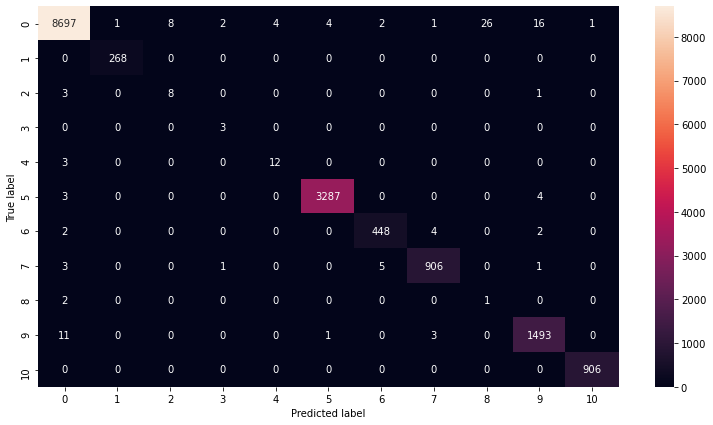

In [289]:
# Visualizing confusion matrix
cm =confusion_matrix(test_y_m,KNN_model.predict(test_X_m))
plt.figure(figsize=(13,7))

sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [130]:
# Saving KNNclassifier model
#with open('cyber_KNN','wb') as model:
#    pickle.dump(KNN_model,model)

#### 5.Support Vector Classifier (SVC)

In [411]:
# initialize the model
m_SVC = SVC( class_weight = 'balanced', gamma = 'auto',probability=True )

# tuning parameters
SVC_params = {'C': [1,2,3], 
              'kernel': ['linear']}

# grid search and cv
SVC_model = GridSearchCV( estimator = m_SVC, 
                         param_grid = SVC_params, 
                         cv = 5, 
                         n_jobs = -1, 
                         verbose = True,
                         scoring = 'roc_auc').fit(X_smote_train,y_smote_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [412]:
# get the best  parameters
print('Best parameters: ', SVC_model.best_params_)

Best parameters:  {'C': 1, 'kernel': 'linear'}


In [413]:
# ROC_AUC score for train and test
print('Train ROC_AUC score:',metrics.roc_auc_score(y_smote_train,SVC_model.predict_proba(X_smote_train),multi_class='ovo'))
svc_m_train = metrics.roc_auc_score(y_smote_train,SVC_model.predict_proba(X_smote_train),multi_class='ovo')
print('-'*40)
print('Test ROC_AUC score:',metrics.roc_auc_score(test_y_m,SVC_model.predict_proba(test_X_m),multi_class='ovo'))
svc_m_test = metrics.roc_auc_score(test_y_m,SVC_model.predict_proba(test_X_m),multi_class='ovo')

Train ROC_AUC score: 0.9962299982154391
----------------------------------------
Test ROC_AUC score: 0.9889855092468468


In [414]:
# Classification report for train data
print(metrics.classification_report(y_smote_train,SVC_model.predict(X_smote_train)))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75     20074
           1       1.00      1.00      1.00     20074
           2       0.91      0.93      0.92     20074
           3       1.00      1.00      1.00     20074
           4       0.96      1.00      0.98     20074
           5       0.95      0.98      0.97     20074
           6       0.95      0.96      0.96     20074
           7       0.97      0.87      0.92     20074
           8       0.75      0.95      0.84     20074
           9       0.90      0.90      0.90     20074
          10       1.00      1.00      1.00     20074

    accuracy                           0.93    220814
   macro avg       0.93      0.93      0.93    220814
weighted avg       0.93      0.93      0.93    220814



In [415]:
# Classification report for test data
print(metrics.classification_report(test_y_m,SVC_model.predict(test_X_m)))

              precision    recall  f1-score   support

           0       0.99      0.65      0.78      8762
           1       0.96      1.00      0.98       268
           2       0.02      0.67      0.04        12
           3       0.15      1.00      0.26         3
           4       0.07      0.80      0.13        15
           5       0.98      0.98      0.98      3294
           6       0.85      0.95      0.89       456
           7       0.93      0.85      0.89       916
           8       0.00      0.67      0.00         3
           9       0.90      0.88      0.89      1508
          10       0.98      1.00      0.99       906

    accuracy                           0.78     16143
   macro avg       0.62      0.86      0.62     16143
weighted avg       0.97      0.78      0.86     16143



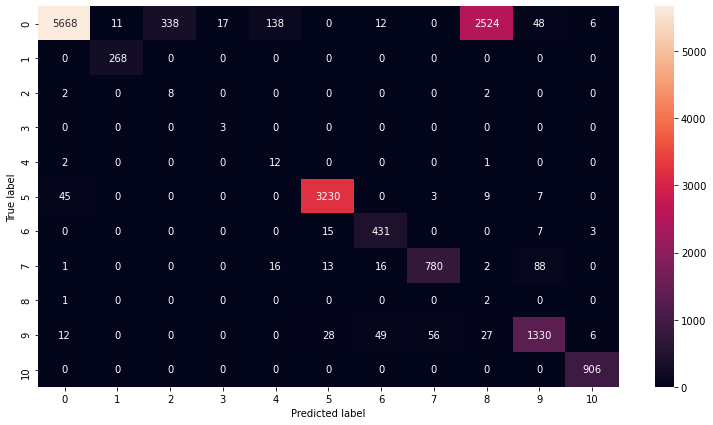

In [416]:
# Visualizing confusion matrix
cm =confusion_matrix(test_y_m,SVC_model.predict(test_X_m))
plt.figure(figsize=(13,7))

sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [120]:
# Saving SVM classifier model
# with open('cyber_SVM','wb') as model:
#     pickle.dump(SVC_model,model)

In [296]:
# Comparing all the models
multinomial_model_comparison = pd.DataFrame()
multinomial_model_comparison['Algorithm'] = ['Naives bayes classifier','Light GBM classifier',
                                             'CatBoost classifier','Support vector classifier',
                                              'KNN classifier']

multinomial_model_comparison['Train ROC_AUC'] =pd.Series([NB_M_train,lgbm_train,cb_train,svc_m_train,
                                                         knn_m_train])

multinomial_model_comparison['Test ROC_AUC'] = pd.Series([NB_M_test,lgbm_test,cb_test,svc_m_test,
                                                         knn_m_test])

multinomial_model_comparison.sort_values(by = ['Train ROC_AUC','Test ROC_AUC'],ascending=False)

Algorithm  Train ROC_AUC  Test ROC_AUC
1       Light GBM classifier       1.000000      0.994345
2        CatBoost classifier       1.000000      0.998330
4             KNN classifier       0.999995      0.942247
3  Support vector classifier       0.996235      0.989001
0    Naives bayes classifier       0.994374      0.974460